## 주제 : 정형 데이터 분석 분야  
### (어드밴스드 리그) 클래식 공연 활성화를 위한 예술의 전당 콘서트홀의 효과적 가격 모델 수립

![Alt text](image-1.png)  
### 제공 데이터타입과 실제 데이터 타입  
![Alt text](media.png)

In [1]:
# 필요한 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.font_manager as fm

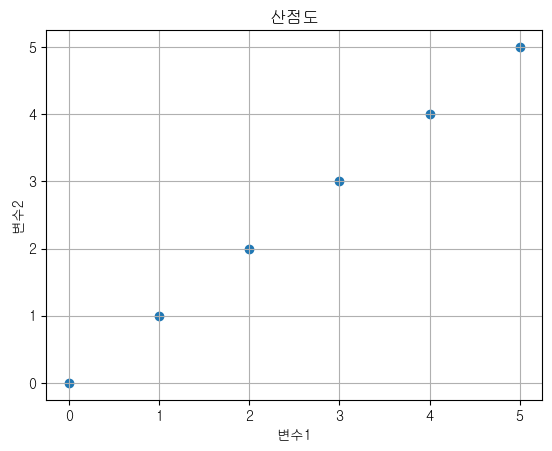

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()

font_location = fm.findfont('NanumGothic')
font_name = fm.FontProperties(fname=font_location).get_name()

In [3]:
# 모든 열 출력
pd.set_option('display.max_columns', None)

In [4]:
# csv파일 불러오기

df = pd.read_csv('2023빅콘테스트_어드밴스드리그_예술의전당.csv', encoding = 'utf8')

In [5]:
df.shape

(1920868, 24)

In [6]:
# 데이터셋 확인
df.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211003,1550,20211009,2000,1층 7열 5,0,0,초대권,1120,NaN,20210823.0,독주,리사이틀홀,90,15,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220917,1520,20221105,2000,1층 C블록 16열 3,0,0,초대권,2283,20220911.0,20220911.0,독주,IBK챔버홀,80,15,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1132,20190731,2000,1층 2열 3,0,0,초대권,2798,NaN,20190701.0,독주,리사이틀홀,90,15,N
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y


In [7]:
df.info() # non-null count 표시가 안되면 옵션값 부여

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920868 entries, 0 to 1920867
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   age                float64
 1   gender             object 
 2   membership_type_1  object 
 3   membership_type_2  object 
 4   membership_type_3  object 
 5   membership_type_4  object 
 6   membership_type_5  object 
 7   membership_type_6  float64
 8   tran_date          int64  
 9   tran_time          int64  
 10  play_date          int64  
 11  play_st_time       int64  
 12  seat               object 
 13  price              int64  
 14  ticket_cancel      int64  
 15  discount_type      object 
 16  performance_code   int64  
 17  pre_open_date      float64
 18  open_date          float64
 19  genre              object 
 20  place              object 
 21  running_time       int64  
 22  intermission       int64  
 23  member_yn          object 
dtypes: float64(4), int64(9), object(11)
memory usage: 

In [8]:
# 결측값 확인하기
df.isna().sum()

age                  1300183
gender               1299714
membership_type_1    1299714
membership_type_2    1433215
membership_type_3    1749009
membership_type_4    1890675
membership_type_5    1919586
membership_type_6    1920868
tran_date                  0
tran_time                  0
play_date                  0
play_st_time               0
seat                       0
price                      0
ticket_cancel              0
discount_type              0
performance_code           0
pre_open_date         864385
open_date                340
genre                  25842
place                      0
running_time               0
intermission               0
member_yn                  0
dtype: int64

In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,age,membership_type_6,tran_date,tran_time,play_date,play_st_time,price,ticket_cancel,performance_code,pre_open_date,open_date,running_time,intermission
count,620685.00,0.00,1920868.00,1920868.00,1920868.00,1920868.00,1920868.00,1920868.00,1920868.00,1056483.00,1920528.00,1920868.00,1920868.00
mean,42.40,NaN,20209376.56,1401.52,20209928.30,1836.36,19534.81,0.33,1449.54,20208853.14,20208839.90,104.48,14.12
std,14.60,NaN,15471.82,403.03,15344.37,212.82,42328.11,0.74,880.85,15027.87,15603.79,17.57,5.28
min,10.00,NaN,20181101.00,0.00,20181117.00,1000.00,0.00,0.00,1.00,20181028.00,20181029.00,0.00,0.00
25%,30.00,NaN,20191002.00,1136.00,20191029.00,1700.00,0.00,0.00,677.00,20190906.00,20190908.00,90.00,15.00
50%,40.00,NaN,20210919.00,1419.00,20211010.00,1930.00,0.00,0.00,1417.00,20210904.00,20210906.00,100.00,15.00
75%,50.00,NaN,20221015.00,1636.00,20221110.00,2000.00,24000.00,0.00,2221.00,20220820.00,20220917.00,120.00,15.00
max,80.00,NaN,20230703.00,2359.00,20230707.00,2000.00,480000.00,2.00,2938.00,20230526.00,20230625.00,350.00,30.00


## EDA

In [10]:
# 경고 안뜨게 변경
import warnings

# FutureWarning을 무시하도록 설정
warnings.simplefilter(action='ignore', category=FutureWarning)


<Axes: >

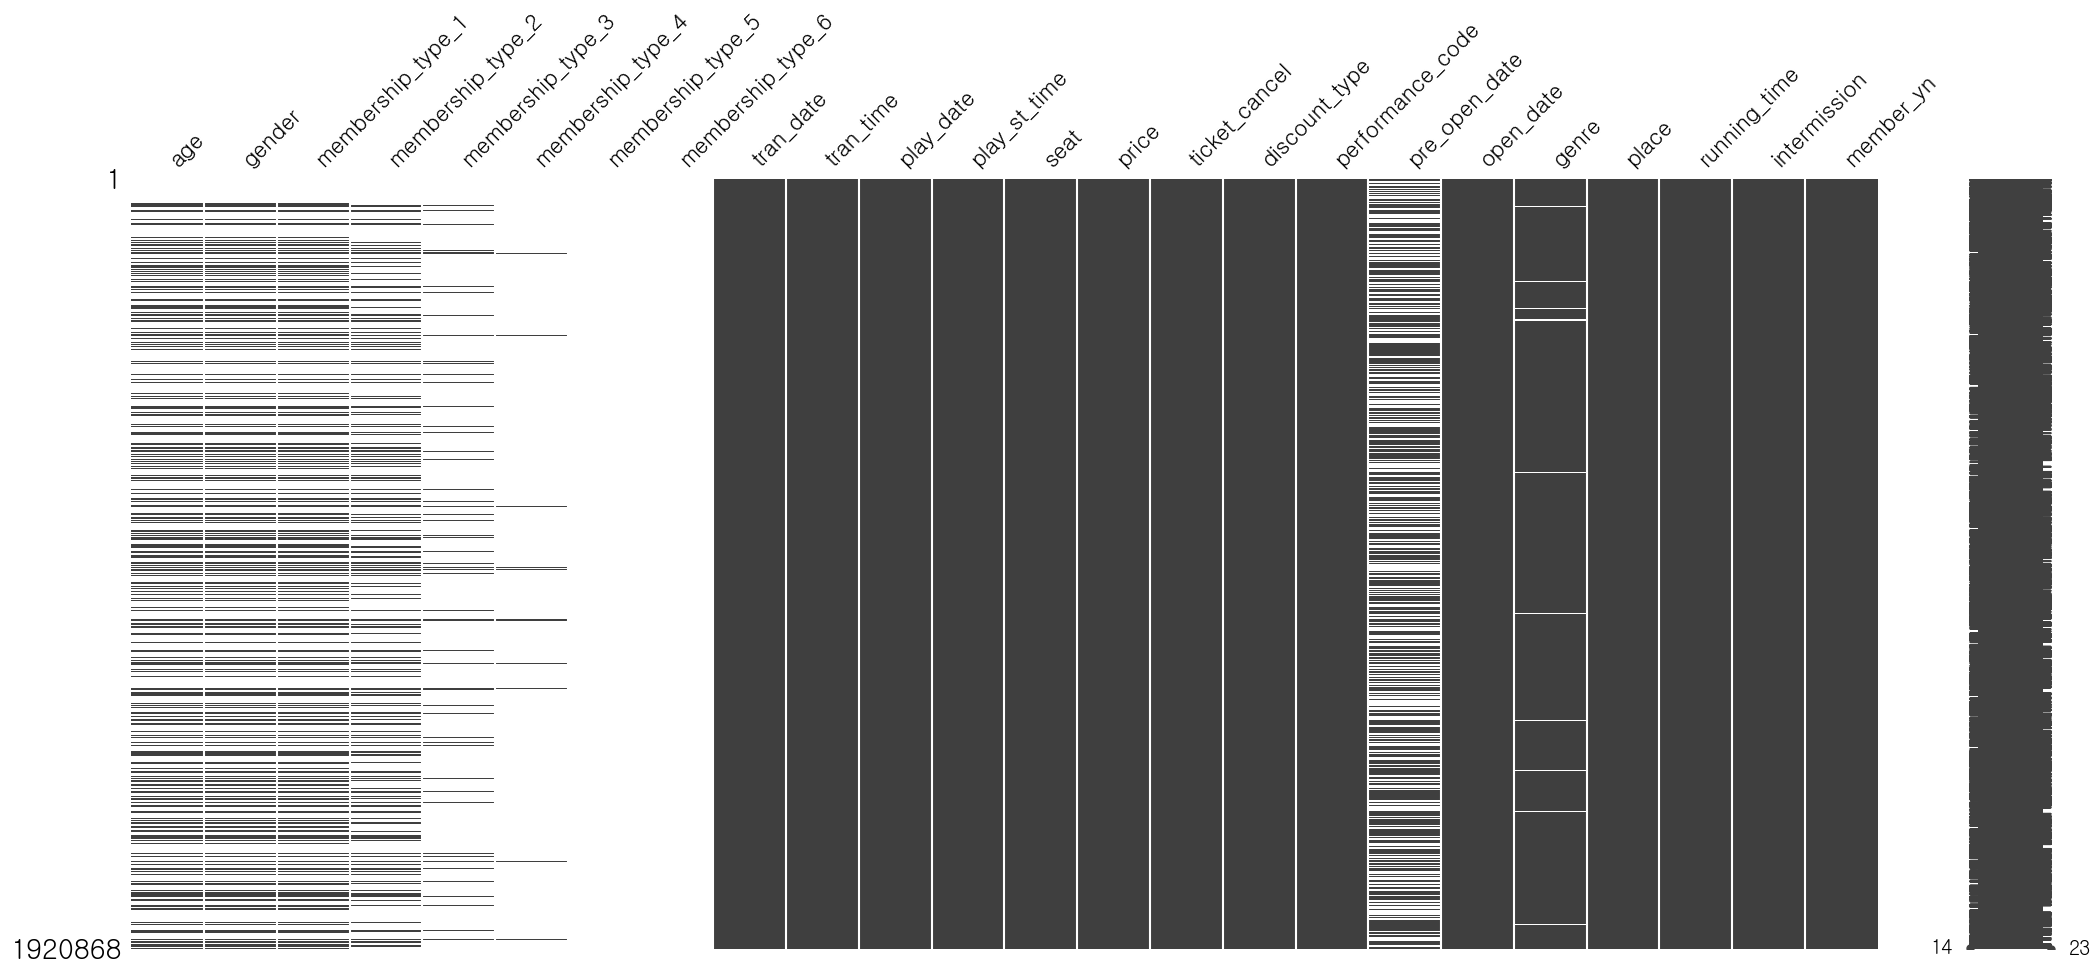

In [11]:
import missingno as msno
msno.matrix(df)

age, gender, pre_open_date, genre에 결측치 확인  
본격적인 분석에 들어가기 전에 앞서 대체가 불가능하다고 판단되는 장르열 삭제, place 전처리

### 1. 장르가 비는 행 삭제

In [12]:
# genre 컬럼의 값이 비어있는 행들을 삭제
# 장르열의 결측치는 대체가 불가능하다고 판단했으며, 또한 약 2만5천개의 결측치로 적은 수라서 삭제
df = df.dropna(subset=['genre'])

### 2. place의 콘서트홀만 추출

In [13]:
# 삭제 전, 고유한 데이터 확인
print(df['place'].value_counts())

place
콘서트홀      1071895
IBK챔버홀     476641
리사이틀홀      346490
Name: count, dtype: int64


In [14]:
# 분석이 필요한 공연장소는 '콘서트홀'이므로 place가 콘서트홀이 아닌 값은 삭제
df = df[df['place'] == '콘서트홀']

# place열도 불필요하니 삭제
df = df.drop('place', axis=1)

### 추론
age, gender, 멤버쉽의 데이터가 일정히 비어있다.
이 경우, 현장 직접 구매거나 초대권 같은 개인정보가 당연히 누락되는 경우가 많을 것

### 3. 결측치 확인

<Axes: >

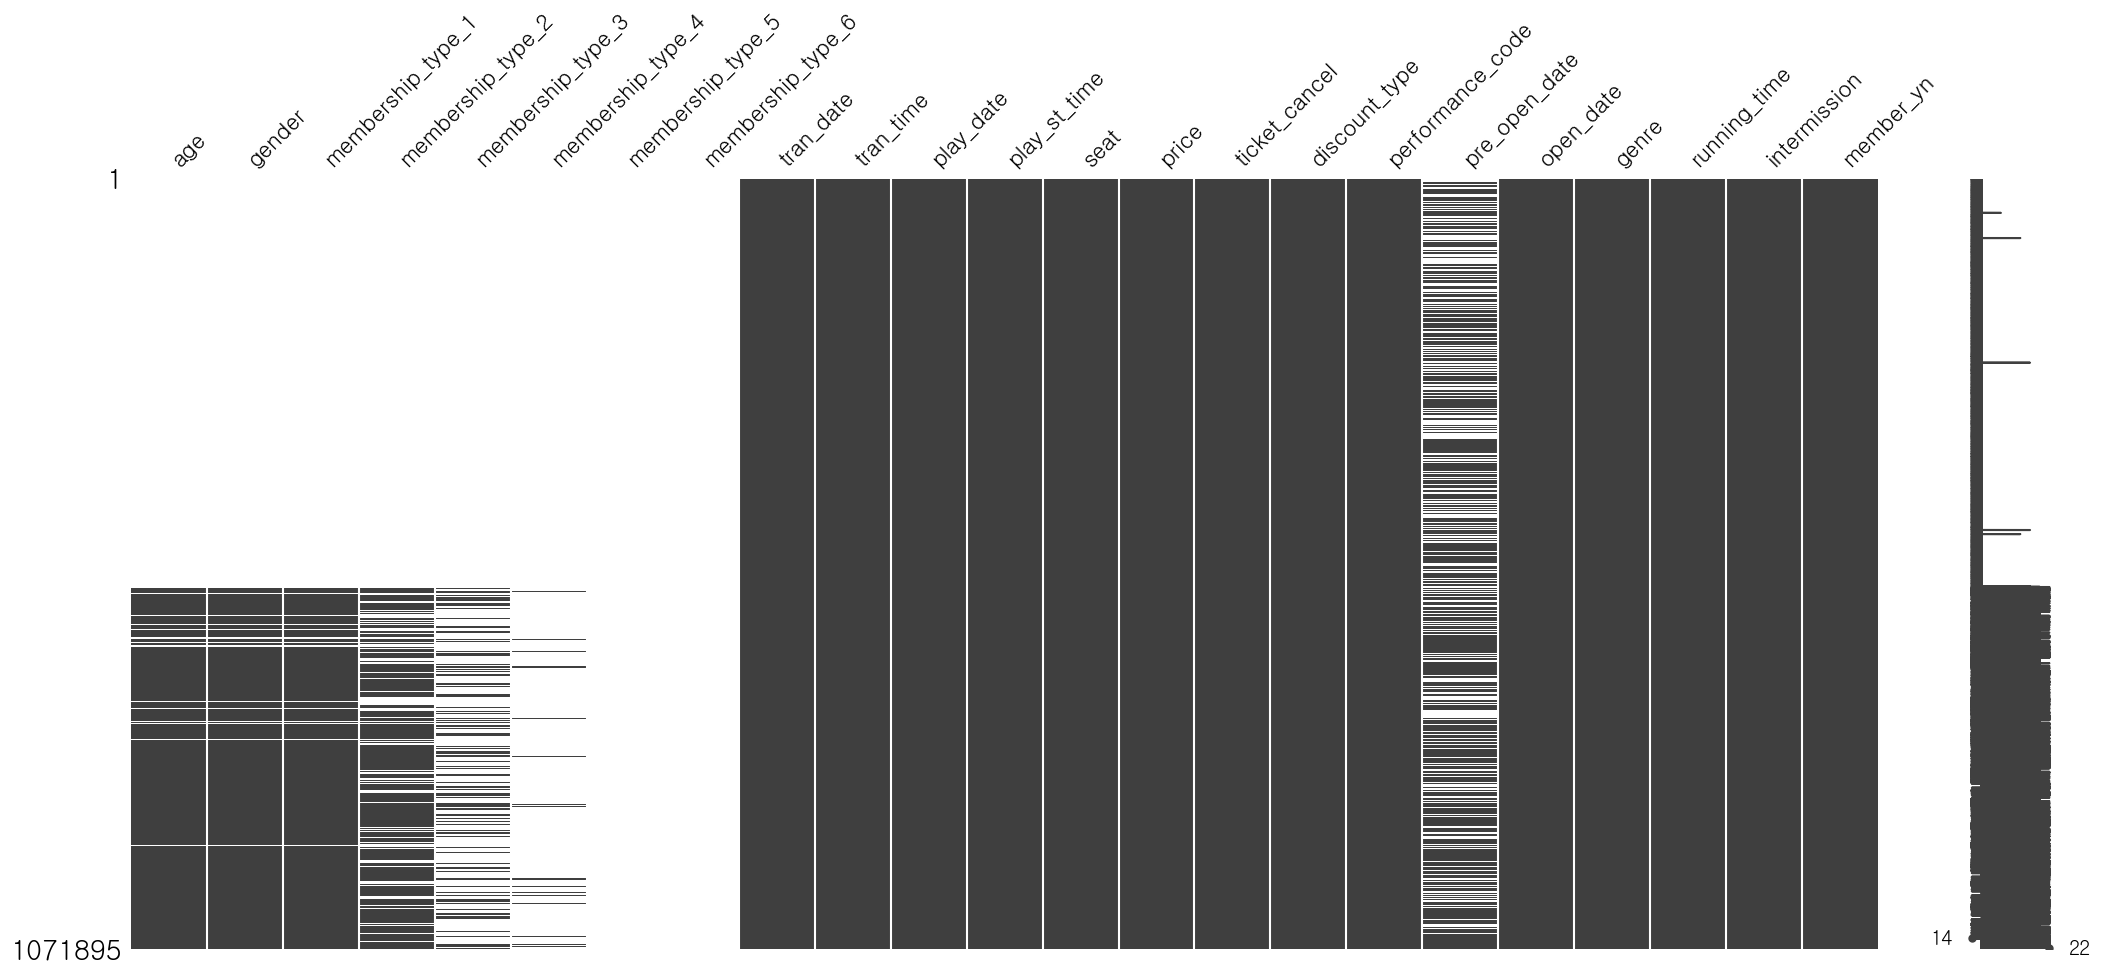

In [15]:
df_sorted = df.sort_values(by='price')

msno.matrix(df_sorted)

<Axes: >

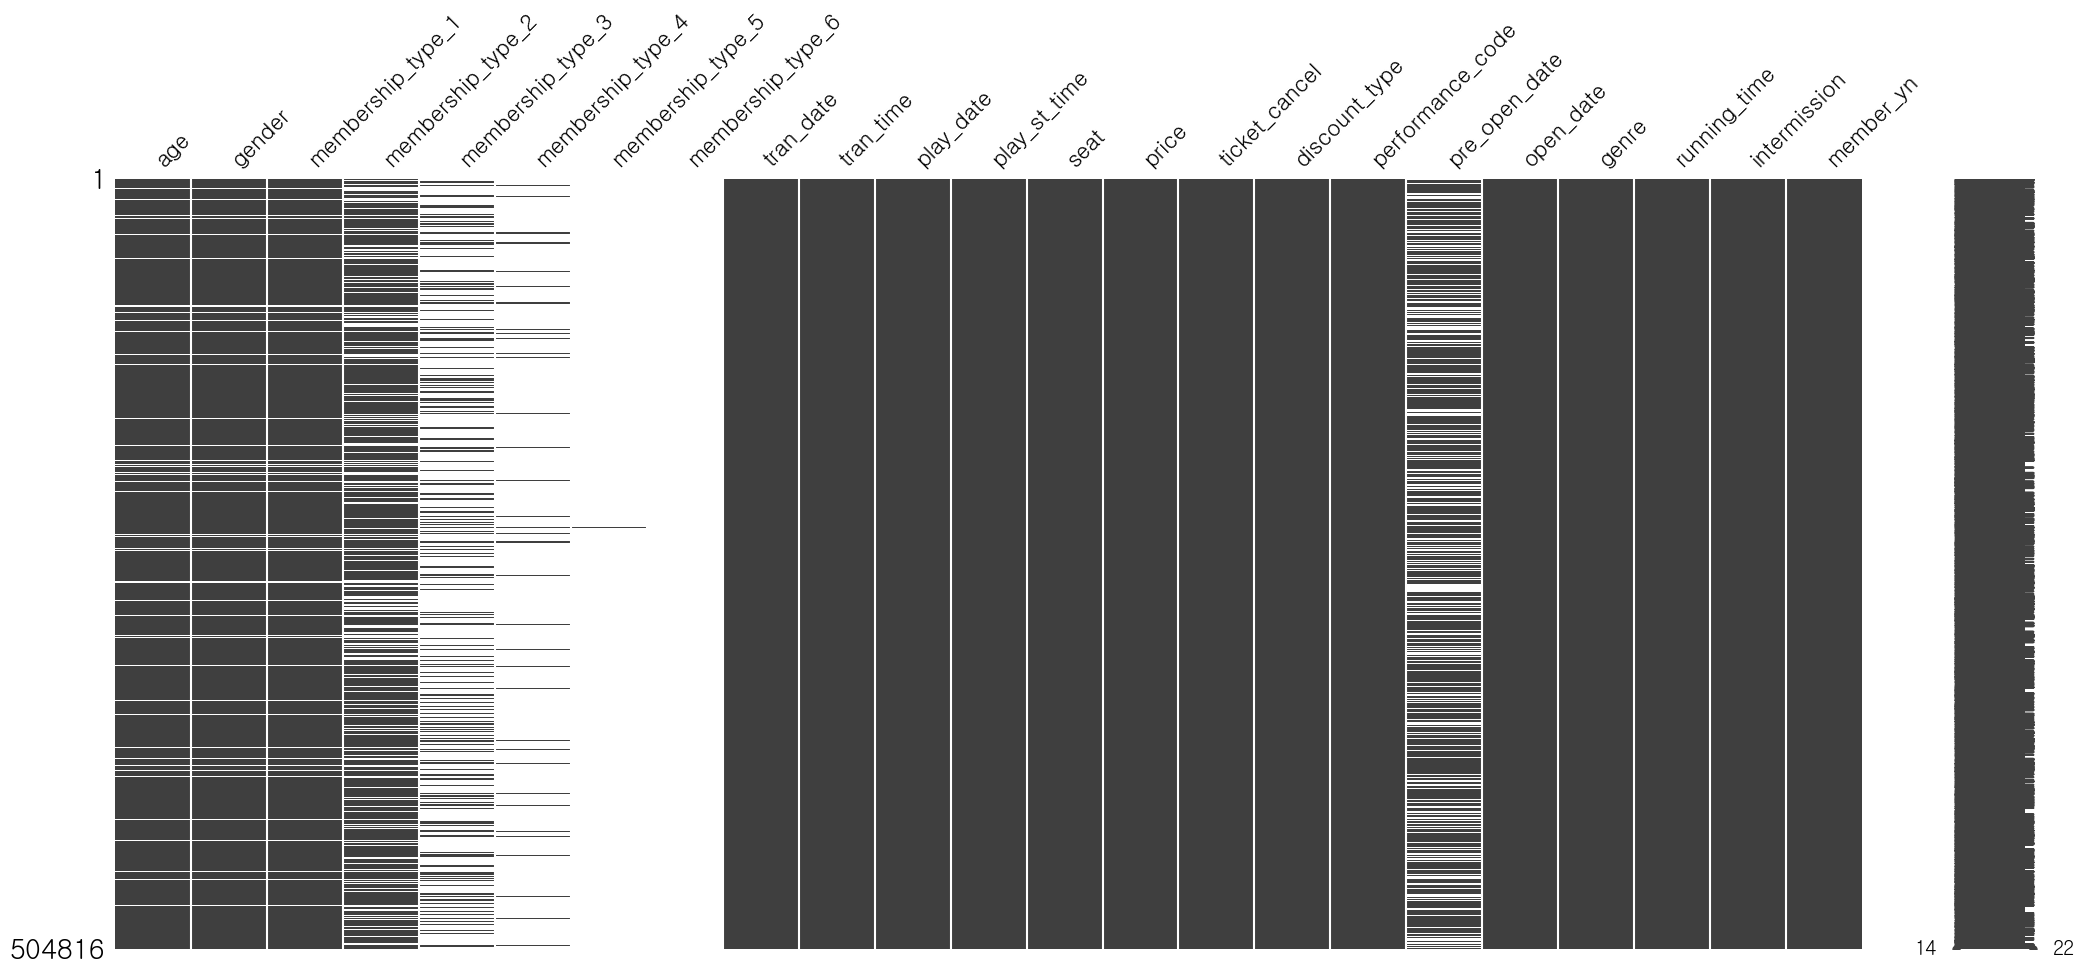

In [16]:
df2 = df[df['price'] != 0]
msno.matrix(df2)

### 4. 티켓가격이 0원인 값 분석

In [17]:
# 티켓 각격이 0원인 값이 전체 데이터의 절반을 넘게 차지
zero_price_count = (df['price'] == 0).sum()
print(zero_price_count)

567079


In [18]:
discount_type_zero_price = df[df['price'] == 0]['discount_type']

In [19]:
unique_values = discount_type_zero_price.unique()
print(unique_values)

['초대권' '기획사판매' '한화초대석' '우리카드 우수회원' '기획사' '신세계석' '정기회원' '공연진행석' '기업석'
 '홍보진행' 'KT석' '문화햇살' '중앙일보 JTBC 초대권' '한화생명' 'BC카드' '기획사할인' '국립심포니'
 '중앙일보 JTBC' '클립서비스(기업)20%할인' '후원회석' '기획사 판매20%' '기획사할인40%' '차액' '신한은행'
 '기획사 판매30%' '홍보마케팅' '홍보진행석' 'Art+초대' '기획사(특별할인)']


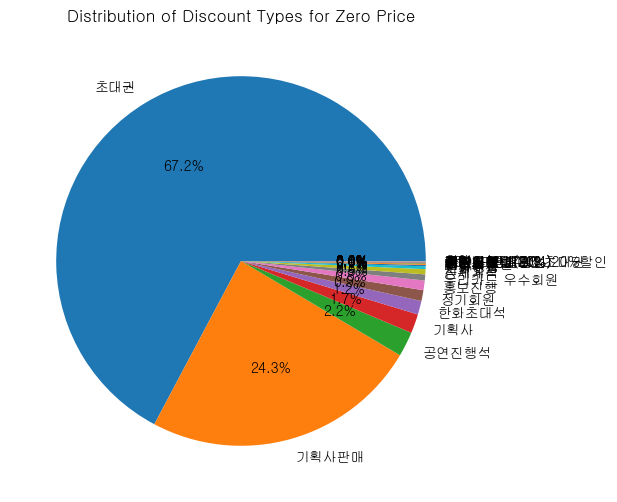

In [20]:
# 각 값의 개수 세기
value_counts = discount_type_zero_price.value_counts()

# 파이 차트
plt.figure(figsize=(10,6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Discount Types for Zero Price')
plt.show()


***초대권***
#### 초대권, 제휴사, 사회공헌프로그램(문화햇살)
'초대권', '한화초대석', '우리카드 우수회원', '기업석', 'KT석', '문화햇살', '중앙일보 JTBC 초대권', '한화생명', 'BC카드', '클립서비스(기업)20%할인', '신한은행', '신세계석', '중앙일보 JTBC'

***기획사***
'기획사판매', '기획사', '기획사할인', '기획사 판매20%', '기획사할인40%', '기획사 판매30%', '기획사(특별할인)'

***공연자***
'공연진행석', '국립심포니', 'Art+초대'

***홍보자***
'홍보진행', '홍보마케팅', '홍보진행석'

***후원자***
'후원회석'

***기타***
'정기회원', '차액' 

In [21]:
df2 = df.copy()

여기서 가격이 0원인 discount_type을 모두 변경하고 간다.

In [22]:
# 변경하려는 원래의 값들
original_data_invitation = ['초대권', '한화초대석', '우리카드 우수회원', '기업석', 'KT석', '문화햇살', '중앙일보 JTBC 초대권', '한화생명', 'BC카드', '클립서비스(기업)20%할인', '신한은행', '신세계석', '중앙일보 JTBC']
original_data_agency = ['기획사판매', '기획사', '기획사할인', '기획사 판매20%', '기획사할인40%', '기획사 판매30%', '기획사(특별할인)']
original_data_artist = ['공연진행석', '국립심포니', 'Art+초대']
original_data_promotion = ['홍보진행', '홍보마케팅', '홍보진행석']
original_data_sponsor = ['후원회석']
original_data_etc = ['정기회원', '차액']



# 조건에 맞는 행 선택 및 값 변경

# 리스트로 묶은 범주형 처리
df2.loc[(df2['price'] == 0) & (df2['discount_type'].isin(original_data_invitation)), 
        ['discount_type']] = "초대권 100% 할인"
df2.loc[(df2['price'] == 0) & (df2['discount_type'].isin(original_data_agency)), 
        ['discount_type']] = "기획사 100% 할인"
df2.loc[(df2['price'] == 0) & (df2['discount_type'].isin(original_data_artist)), 
        ['discount_type']] = "연주자 100% 할인"
df2.loc[(df2['price'] == 0) & (df2['discount_type'].isin(original_data_promotion)), 
        ['discount_type']] = "홍보 100% 할인"
df2.loc[(df2['price'] == 0) & (df2['discount_type'].isin(original_data_sponsor)), 
        ['discount_type']] = "후원 100% 할인"
df2.loc[(df2['price'] == 0) & (df2['discount_type'].isin(original_data_etc)), 
        ['discount_type']] = "기타 100% 할인"

#### 모두 100% 할인으로 재집계 확인

In [23]:
discount_type_zero_price = df2[df2['price'] == 0]['discount_type']
unique_values = discount_type_zero_price.unique()
print(unique_values)

['초대권 100% 할인' '기획사 100% 할인' '기타 100% 할인' '연주자 100% 할인' '홍보 100% 할인'
 '후원 100% 할인']


### 5. seat2 파생변수 생성

In [24]:
# 추후, 모델 학습 전처리를 위해 seat2를 생성하여 작업
df2['seat2'] = df2['seat']

# "합창석"으로 시작하는 행만 선택하고, 그 행에서 "블록" 이후의 문자열 삭제
df2.loc[df2['seat2'].str.startswith('합창석'), 'seat2'] = df2[df2['seat'].str.startswith('합창석')]['seat2'].str.replace(r'(블록).*$', r'\1', regex=True)

# "2층"으로 시작하는 행만 선택하고, 그 행에서 "BOX" 이후의 문자열 삭제
df2.loc[df2['seat2'].str.startswith('2층'), 'seat2'] = df2[df2['seat'].str.startswith('2층')]['seat2'].str.replace(r'(BOX).*$', r'\1', regex=True)

# "3층"으로 시작하는 행만 선택하고, 그 행에서 "블록" 이후의 문자열 삭제
df2.loc[df2['seat2'].str.startswith('3층'), 'seat2'] = df2[df2['seat'].str.startswith('3층')]['seat2'].str.replace(r'(블록).*$', r'\1', regex=True)

# "3층"으로 시작하는 행만 선택하고, 그 행에서 "BOX" 이후의 문자열 삭제
df2.loc[df2['seat2'].str.startswith('3층'), 'seat2'] = df2[df2['seat'].str.startswith('3층')]['seat2'].str.replace(r'(BOX).*$', r'\1', regex=True)

In [25]:
df2.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2
0,50.00,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.00,20220115.00,교향곡,120,15,Y,3층 BOX
4,50.00,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.00,20220110.00,독주,90,0,Y,1층 B블록12열 7
5,30.00,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.00,20181119.00,교향곡,100,15,Y,1층 A블록2열 1
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,20191109,1700,3층 E블록4열 8,0,0,초대권 100% 할인,44,NaN,20191023.00,교향곡,100,15,N,3층 E블록
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,20190723,2000,2층 D블록8열 4,0,0,초대권 100% 할인,827,20190602.00,20190602.00,교향곡,120,20,N,2층 D블록8열 4


### 6. 가격이 0원인 좌석 분석

In [26]:
# 'seat2' 컬럼의 결측치를 확인합니다.
print(df2['seat2'].isnull().sum())

0


In [27]:
# 가격이 0원인 좌석의 개수 1768개
filtered_df = df2[df2['price'] == 0]
unique_seat_count = filtered_df['seat2'].nunique()
print(unique_seat_count)

1768


In [28]:
# 모든 좌석의 개수 1772개
unique_seat_count = df2['seat2'].nunique()
print(unique_seat_count)

1772


In [29]:
filtered_df = df2[df2['price'] == 0]
seat_counts = filtered_df['seat2'].value_counts()

for seat, count in seat_counts.items():
    print(f"{seat}: {count}개")

2층 BOX: 8686개
합창석 G블록: 8040개
3층 G블록: 7738개
3층 A블록: 7617개
3층 D블록: 7227개
3층 C블록: 7140개
3층 E블록: 6910개
3층 BOX: 5911개
합창석 H블록: 5424개
합창석 F블록: 5269개
3층 F블록: 4607개
3층 B블록: 4544개
3층 N블록: 3293개
3층 M블록: 3267개
1층 C블록13열 1: 813개
1층 B블록15열 13: 727개
1층 A블록15열 12: 725개
1층 A블록15열 9: 716개
1층 A블록15열 10: 714개
1층 A블록15열 11: 713개
1층 B블록15열 12: 710개
1층 C블록13열 2: 705개
1층 C블록13열 4: 704개
1층 C블록13열 3: 703개
2층 C블록7열 13: 697개
2층 C블록7열 12: 697개
2층 C블록7열 1: 697개
2층 C블록7열 2: 696개
1층 C블록13열 5: 591개
1층 C블록13열 6: 589개
1층 C블록15열 14: 495개
1층 C블록15열 13: 476개
1층 D블록15열 7: 395개
1층 D블록15열 11: 394개
1층 D블록15열 5: 387개
1층 D블록18열 8: 383개
1층 D블록11열 7: 383개
1층 D블록16열 8: 382개
1층 D블록10열 8: 380개
1층 D블록14열 8: 380개
1층 D블록12열 2: 379개
1층 C블록15열 11: 377개
1층 D블록15열 9: 375개
1층 D블록13열 7: 374개
1층 B블록16열 6: 374개
1층 D블록12열 8: 373개
1층 D블록16열 4: 372개
1층 D블록13열 5: 372개
1층 D블록11열 5: 370개
1층 D블록11열 11: 370개
1층 D블록12열 6: 370개
1층 D블록17열 11: 367개
1층 D블록16열 2: 367개
1층 D블록10열 4: 367개
1층 D블록9열 5: 367개
1층 D블록19열 7: 366개
1층 D블록13열 11: 366개
1층 B블록16열 8: 366개


티켓가격이 0원인 관람객들 대부분 2층, 합창석, 3층같은 비교적 저렴한 좌석에 앉음

In [30]:
filtered_df = df2[df2['discount_type'] == '초대권 100% 할인']

seat_counts = filtered_df['seat2'].value_counts()

for seat, count in seat_counts.items():
    print(f"{seat}: {count}개")

print(filtered_df.shape)

합창석 G블록: 5720개
2층 BOX: 5661개
3층 G블록: 5628개
3층 A블록: 5534개
3층 D블록: 4951개
3층 E블록: 4912개
3층 C블록: 4889개
3층 BOX: 4264개
합창석 H블록: 3548개
합창석 F블록: 3363개
3층 B블록: 3342개
3층 F블록: 3338개
3층 M블록: 2494개
3층 N블록: 2488개
1층 D블록15열 11: 295개
1층 D블록15열 7: 290개
1층 D블록18열 8: 286개
1층 D블록16열 8: 285개
1층 D블록15열 5: 282개
1층 D블록16열 4: 279개
1층 D블록10열 8: 279개
1층 D블록11열 7: 276개
1층 D블록15열 9: 275개
1층 D블록6열 8: 274개
1층 D블록16열 2: 273개
1층 D블록14열 8: 271개
1층 B블록16열 6: 271개
1층 B블록11열 5: 271개
1층 D블록13열 7: 270개
1층 D블록18열 4: 270개
1층 D블록12열 8: 269개
1층 D블록18열 2: 269개
1층 D블록13열 11: 269개
1층 D블록19열 7: 269개
1층 D블록11열 11: 269개
1층 B블록7열 5: 268개
1층 D블록15열 1: 267개
1층 D블록19열 11: 267개
1층 D블록17열 11: 267개
1층 D블록10열 4: 267개
1층 B블록18열 6: 266개
1층 D블록7열 7: 266개
1층 C블록12열 12: 265개
1층 D블록15열 13: 264개
1층 D블록10열 6: 264개
1층 D블록18열 6: 264개
1층 D블록19열 13: 264개
1층 D블록16열 12: 264개
1층 D블록20열 8: 263개
1층 B블록11열 9: 262개
1층 D블록10열 2: 262개
1층 D블록16열 10: 262개
1층 D블록11열 5: 261개
1층 C블록15열 11: 261개
1층 D블록17열 7: 261개
1층 B블록16열 8: 261개
1층 D블록16열 6: 261개
1층 C블록12열 10: 260개


티켓가 0원 중에서 가장 많은 부분을 차지하는 초대권을 따로 분류해서 확인했지만, 마찬가지로 가장 저렴한 좌석들이 대부분

### 7. 초대권과 멤버쉽의 연관성 분석

In [31]:
# 초대권에 멤버쉽을 사용해서 관람했는지 확인
filtered_df = df2[df2['discount_type'] == '초대권 100% 할인']
membership_counts = filtered_df['membership_type_1'].value_counts()

for membership, count in membership_counts.items():
    print(f"{membership}: {count}개")



블루: 2개


In [32]:
filtered_df = df2[df2['discount_type'] == '초대권 100% 할인']
filtered_df2 = filtered_df[filtered_df['membership_type_1'] == '블루']
filtered_df2

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2
522526,40.00,F,블루,무료,그린,NaN,NaN,NaN,20221211,1847,20221217,1700,2층 E블록8열 8,0,2,초대권 100% 할인,2020,20221119.00,20221120.00,교향곡,95,15,Y,2층 E블록8열 8
830223,40.00,F,블루,무료,그린,NaN,NaN,NaN,20221211,1702,20221217,1700,2층 E블록8열 8,0,2,초대권 100% 할인,2020,20221119.00,20221120.00,교향곡,95,15,Y,2층 E블록8열 8


멤버쉽을 보유한 관람객이 초대권을 사용한 데이터가 2개 존재하지만, 전부 예매 취소에다가 너무 적어서 신경쓸 필요 없어보임

### 8. seat열 전처리

In [189]:
df3 = df2.copy()

In [190]:
# 블록 뒤에 나오는 값 삭제
df3['seat2'] = df3['seat2'].str.replace(r'\s*\d+열\s*\d*$', '', regex=True)

In [191]:
# 층 뒤에 나오는 값 삭제
df3['seat3'] = df3['seat2']
#df3['seat3'] = df3['seat3'].str.extract(r'(\d+층)')
df3['seat3'] = df3['seat3'].str.replace(r'(층.*|석.*)', '', regex=True)


<Axes: >

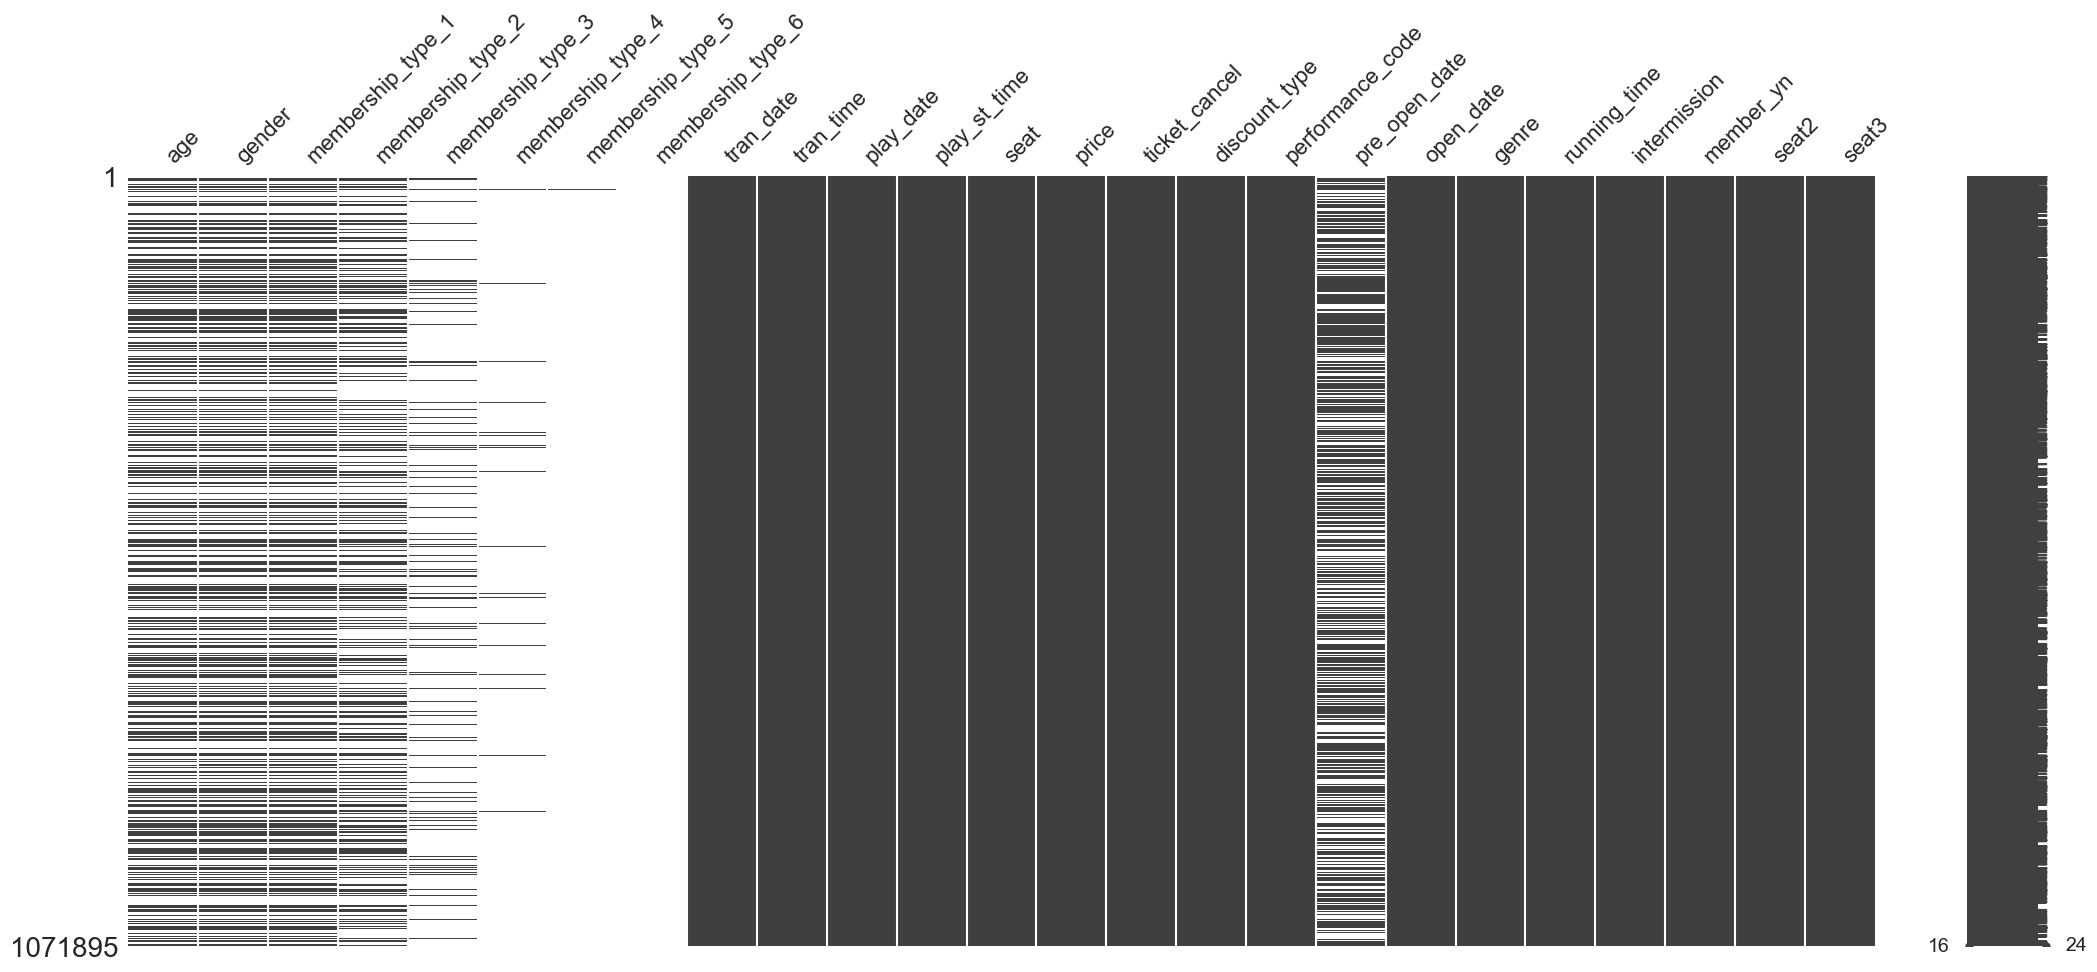

In [192]:
msno.matrix(df3)

In [193]:
df3.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2,seat3
0,50.00,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.00,20220115.00,교향곡,120,15,Y,3층 BOX,3
4,50.00,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.00,20220110.00,독주,90,0,Y,1층 B블록,1
5,30.00,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.00,20181119.00,교향곡,100,15,Y,1층 A블록,1
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,20191109,1700,3층 E블록4열 8,0,0,초대권 100% 할인,44,NaN,20191023.00,교향곡,100,15,N,3층 E블록,3
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,20190723,2000,2층 D블록8열 4,0,0,초대권 100% 할인,827,20190602.00,20190602.00,교향곡,120,20,N,2층 D블록,2


In [194]:
print(df3[df3['seat3'].isnull()]['seat2'])

Series([], Name: seat2, dtype: object)


### 9. 하나의 공연에 모든 좌석이 0원인 공연코드 삭제

각 공연코드별로 가격이 0원인 좌석을 분석하던도중 모든 좌석이 0원인 공연코드가 다수 존재하는 점을 확인

In [195]:
# 각 '공연코드'별로 'price' 합계를 계산
price_sum = df3.groupby('performance_code')['price'].sum()

# 합계가 0인 '공연코드'를 찾음
zero_price_codes = price_sum[price_sum == 0]

# 공연코드명 출력
print(zero_price_codes)

# 공연코드명 개수 출력
print(len(zero_price_codes))

performance_code
29      0
30      0
31      0
53      0
72      0
73      0
94      0
130     0
137     0
174     0
186     0
197     0
217     0
229     0
231     0
232     0
234     0
350     0
419     0
544     0
547     0
576     0
648     0
1150    0
1209    0
1496    0
1509    0
1537    0
1735    0
1736    0
2133    0
2157    0
2161    0
2164    0
2167    0
2168    0
2174    0
2175    0
2180    0
2181    0
2215    0
2230    0
2252    0
2253    0
2260    0
2261    0
2268    0
2747    0
2775    0
2808    0
Name: price, dtype: int64
50


각 공연코드별로 티켓가격을 합계했을때 0원인 값 삭제

In [196]:
# 각 'performance_code'별로 'price' 합계를 계산
df3['total_price'] = df3.groupby('performance_code')['price'].transform('sum')

# 합계가 0인 'performance_code'를 가진 행을 삭제
df3 = df3[df3['total_price'] != 0]

# 더 이상 필요 없는 'total_price' 컬럼을 삭제
df3 = df3.drop('total_price', axis=1)

삭제 후, 모든 좌석이 0원인 값이 없음을 다시 확인

In [197]:
# 각 '공연코드'별로 'price' 합계를 계산
price_sum = df3.groupby('performance_code')['price'].sum()

# 합계가 0인 '공연코드'를 찾음
zero_price_codes = price_sum[price_sum == 0]

# 공연코드명 출력
print(zero_price_codes)

# 공연코드명 개수 출력
print(len(zero_price_codes))

Series([], Name: price, dtype: int64)
0


### 10. 티켓 가격이 0원인 좌석 전처리

본 프로젝트의 목적은 '효율적인 티켓가격 수립'임.  
또한, 티켓가격이 0원인 값은 모델 예측에 있어서 안좋은 영향을 끼친다고 생각하여 다른 값으로 대체

현재 약 96만개의 행 중에서 약 40만개의 행의 가격이 전부 0원으로 측정됨.
0원인 값을 대체하기 전에, 각 공연코드마다 좌석의 가격이 0원인 값이 50%, 60%, 70%, 80%, 90% 이상되는 공연코드가 존재하는지 확인


In [198]:
df3.shape

(962834, 25)

각 공연코드별로 계산을 하였을 경우, price가 0원인 값이 50%이 넘어가는 공연코드를 출력

In [199]:
# 각 'performance_code'별로 'price'가 0인 경우의 비율을 계산
zero_price_ratio = df3.groupby('performance_code').apply(lambda x: (x['price'] == 0).mean())

# 비율이 50% 이상인 'performance_code'를 찾음
high_zero_price_codes = zero_price_ratio[zero_price_ratio >= 0.5]

print(high_zero_price_codes)

performance_code
1      0.96
7      0.97
40     0.88
44     0.51
54     0.76
       ... 
2838   0.60
2839   0.74
2840   0.85
2841   0.67
2903   0.96
Length: 270, dtype: float64


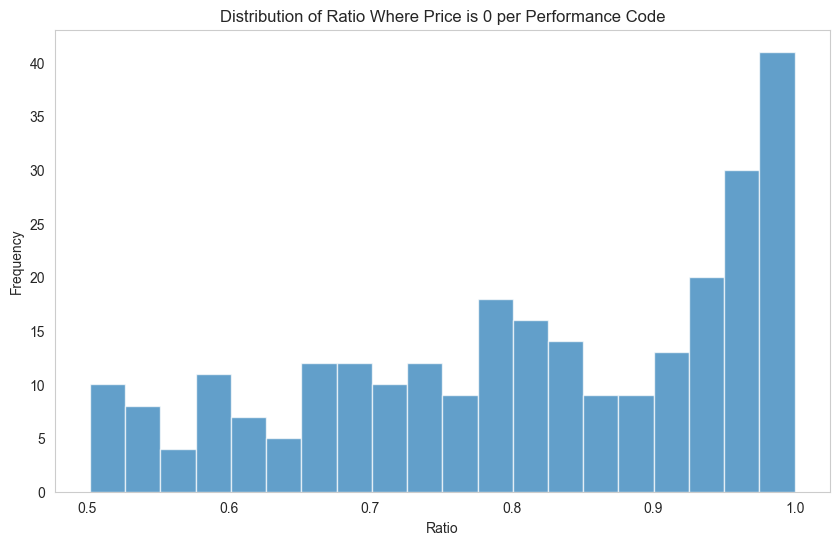

In [200]:
# 크기 설정
plt.figure(figsize=(10,6))

# 히스토그램 생성
plt.hist(high_zero_price_codes, bins=20, alpha=0.7)

# 제목 및 레이블 추가
plt.title('Distribution of Ratio Where Price is 0 per Performance Code')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.grid(False)
# 그래프 출력
plt.show()

### 각 공연코드별로 계산하였을때 0원인 좌석 비율 0.75이상은 삭제

In [201]:
df4 = df3.copy()

In [202]:
zero_price_count = (df4['price'] == 0).sum()
null_price_count = df4['price'].isnull().sum()
print("Price가 0인 데이터 개수:", zero_price_count)
print("Price가 결측치인 데이터 개수:", null_price_count)

Price가 0인 데이터 개수: 458018
Price가 결측치인 데이터 개수: 0


In [203]:
# 각 'performance_code'별로 'price'가 0인 경우의 비율을 계산
zero_price_ratio = df4.groupby('performance_code').apply(lambda x: (x['price'] == 0).mean())

# 비율이 90% 이상인 'performance_code'를 찾음
high_zero_price_codes = zero_price_ratio[zero_price_ratio >= 0.75].index

# 해당하는 performance_code를 가진 행을 삭제
df4 = df4[~df4['performance_code'].isin(high_zero_price_codes)]
df4.shape

(640901, 25)

In [204]:
df4.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2,seat3
0,50.00,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,20220204,2000,3층 BOX9 10,10000,2,일반,302,20220114.00,20220115.00,교향곡,120,15,Y,3층 BOX,3
4,50.00,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,20220302,1930,1층 B블록12열 7,180000,0,일반,897,20220109.00,20220110.00,독주,90,0,Y,1층 B블록,1
5,30.00,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,20190323,2000,1층 A블록2열 1,144000,2,블루회원 할인20%,528,20181119.00,20181119.00,교향곡,100,15,Y,1층 A블록,1
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,20191109,1700,3층 E블록4열 8,0,0,초대권 100% 할인,44,NaN,20191023.00,교향곡,100,15,N,3층 E블록,3
9,NaN,F,블루,무료,NaN,NaN,NaN,NaN,20190703,908,20190721,1700,1층 C블록17열 3,75000,0,일반,1528,NaN,20190413.00,클래식,100,15,N,1층 C블록,1


In [205]:
# 위와 같은 결측치 현상을 대체하기 위해서 1~3층 블록별로 그룹화해서 평균낸값을 nan값으로 대체
grouped_price = df4.groupby(['performance_code', 'seat2'])['price'].mean()

# 데이터프레임을 reset_index()로 재설정하여 grouped_price를 DataFrame으로 변환
grouped_price_df = grouped_price.reset_index()
grouped_price_df.columns = ['performance_code', 'seat2', 'mean_price']

# 'performance_code'와 'seat2' 열을 기준 df4와 grouped_price_df를 병합
df5 = pd.merge(df4, grouped_price_df, on=['performance_code', 'seat2'], how='left')

# np.where 함수를 사용하여 price가 0인 경우에만 mean_price로 대체
df5['price'] = np.where(df5['price'] == 0, df5['mean_price'], df5['price'])

# 필요없어진 mean_price 열을 삭제
df5.drop(columns=['mean_price'], inplace=True)

In [206]:
zero_price_count = (df5['price'] == 0).sum()
null_price_count = df5['price'].isnull().sum()
print("Price가 0인 데이터 개수:", zero_price_count)
print("Price가 결측치인 데이터 개수:", null_price_count)

Price가 0인 데이터 개수: 7570
Price가 결측치인 데이터 개수: 0


In [207]:
# 위와 같은 결측치 현상을 대체하기 위해서 1~3층별로 그룹화해서 평균낸값을 nan값으로 대체
grouped_price = df4.groupby(['performance_code', 'seat3'])['price'].mean()

# 데이터프레임을 reset_index()로 재설정하여 grouped_price를 DataFrame으로 변환
grouped_price_df = grouped_price.reset_index()
grouped_price_df.columns = ['performance_code', 'seat3', 'mean_price']

# 'performance_code'와 'seat2' 열을 기준 df4와 grouped_price_df를 병합
df5 = pd.merge(df4, grouped_price_df, on=['performance_code', 'seat3'], how='left')

# np.where 함수를 사용하여 price가 0인 경우에만 mean_price로 대체
df5['price'] = np.where(df5['price'] == 0, df5['mean_price'], df5['price'])

# 필요없어진 mean_price 열을 삭제
df5.drop(columns=['mean_price'], inplace=True)

In [208]:
zero_price_count = (df5['price'] == 0).sum()
null_price_count = df5['price'].isnull().sum()
print("Price가 0인 데이터 개수:", zero_price_count)
print("Price가 결측치인 데이터 개수:", null_price_count)

Price가 0인 데이터 개수: 725
Price가 결측치인 데이터 개수: 0


In [210]:
df_zero_price = df5[df5['price'] == 0]
df_zero_price.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2,seat3
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201116,1022,20201125,1930,2층 A블록5열 5,0.00,0,초대권 100% 할인,898,20200823.00,20200824.00,클래식,100,15,N,2층 A블록,2
1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201024,1249,20201125,1930,2층 C블록1열 9,0.00,0,초대권 100% 할인,898,20200823.00,20200824.00,클래식,100,15,N,2층 C블록,2
1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201023,1026,20201029,1930,3층 C블록7열 13,0.00,0,초대권 100% 할인,454,20200926.00,20200927.00,교향곡,105,15,N,3층 C블록,3
3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211118,1825,20211123,1930,합창석 G블록4열 15,0.00,0,기획사 100% 할인,105,20211119.00,20211119.00,교향곡,120,15,N,합창석 G블록,합창
3743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201024,1249,20201125,1930,2층 B블록5열 6,0.00,0,초대권 100% 할인,898,20200823.00,20200824.00,클래식,100,15,N,2층 B블록,2


In [219]:
print(df_zero_price['performance_code'].value_counts())

performance_code
898     320
105     312
454      73
348       4
2482      4
534       4
144       4
357       4
Name: count, dtype: int64


In [228]:
df_selected = df5[(df5['performance_code'] == 898) & (df5['seat3'] == '1')]
df_selected.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2,seat3
531,40.00,F,골드,무료,NaN,NaN,NaN,NaN,20200823,1407,20200912,1700,1층 D블록13열 3,123000.00,0,골드회원 할인5%,898,20200823.00,20200824.00,클래식,100,15,Y,1층 D블록,1
2129,60.00,F,무료,그린,NaN,NaN,NaN,NaN,20200823,1408,20200912,1700,1층 B블록19열 3,110000.00,0,일반,898,20200823.00,20200824.00,클래식,100,15,Y,1층 B블록,1
2384,40.00,F,무료,그린,NaN,NaN,NaN,NaN,20200823,1401,20200912,1700,1층 B블록13열 9,130000.00,0,일반,898,20200823.00,20200824.00,클래식,100,15,Y,1층 B블록,1
5233,50.00,F,무료,그린,NaN,NaN,NaN,NaN,20200823,1400,20200912,1700,1층 C블록4열 10,130000.00,0,일반,898,20200823.00,20200824.00,클래식,100,15,Y,1층 C블록,1
11488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201025,1835,20201125,1930,1층 A블록15열 12,100450.26,0,연주자 100% 할인,898,20200823.00,20200824.00,클래식,100,15,N,1층 A블록,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624416,30.00,F,무료,그린,NaN,NaN,NaN,NaN,20200823,1403,20200912,1700,1층 E블록8열 8,110000.00,0,일반,898,20200823.00,20200824.00,클래식,100,15,Y,1층 E블록,1
626309,50.00,F,무료,그린,NaN,NaN,NaN,NaN,20200823,1407,20200912,1700,1층 C블록12열 14,130000.00,0,일반,898,20200823.00,20200824.00,클래식,100,15,Y,1층 C블록,1
626738,30.00,F,무료,그린,NaN,NaN,NaN,NaN,20200823,1402,20200912,1700,1층 C블록20열 6,110000.00,2,일반,898,20200823.00,20200824.00,클래식,100,15,Y,1층 C블록,1
628422,50.00,F,무료,그린,NaN,NaN,NaN,NaN,20200823,1402,20200912,1700,1층 E블록20열 8,110000.00,0,일반,898,20200823.00,20200824.00,클래식,100,15,Y,1층 E블록,1


### 각 공연코드마다 N층의 합계가 0원인 값 전처리

In [227]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640901 entries, 0 to 640900
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                448635 non-null  float64
 1   gender             448905 non-null  object 
 2   membership_type_1  448905 non-null  object 
 3   membership_type_2  362443 non-null  object 
 4   membership_type_3  131850 non-null  object 
 5   membership_type_4  23979 non-null   object 
 6   membership_type_5  1071 non-null    object 
 7   membership_type_6  0 non-null       float64
 8   tran_date          640901 non-null  int64  
 9   tran_time          640901 non-null  int64  
 10  play_date          640901 non-null  int64  
 11  play_st_time       640901 non-null  int64  
 12  seat               640901 non-null  object 
 13  price              640901 non-null  float64
 14  ticket_cancel      640901 non-null  int64  
 15  discount_type      640901 non-null  object 
 16  pe

#### 898 전처리

In [231]:
# 평균값 계산
avg_price_1 = df5[(df5['performance_code'] == 898) & (df5['seat3'] == '1')]['price'].mean()
avg_price_3 = df5[(df5['performance_code'] == 898) & (df5['seat3'] == '3')]['price'].mean()

# 평균으로 값 대체
df5.loc[(df5['performance_code'] == 898) & (df5['seat3'] == '2') & (df5['price'] == 0), 'price'] = (avg_price_1 + avg_price_3) / 2

In [235]:
df_selected = df5[(df5['performance_code'] == 898) & (df5['seat3'] == '2')]
df_selected.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2,seat3
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201116,1022,20201125,1930,2층 A블록5열 5,85087.98,0,초대권 100% 할인,898,20200823.00,20200824.00,클래식,100,15,N,2층 A블록,2
1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201024,1249,20201125,1930,2층 C블록1열 9,85087.98,0,초대권 100% 할인,898,20200823.00,20200824.00,클래식,100,15,N,2층 C블록,2
3743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201024,1249,20201125,1930,2층 B블록5열 6,85087.98,0,초대권 100% 할인,898,20200823.00,20200824.00,클래식,100,15,N,2층 B블록,2
5103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201024,1249,20201125,1930,2층 A블록5열 19,85087.98,0,초대권 100% 할인,898,20200823.00,20200824.00,클래식,100,15,N,2층 A블록,2
10399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201024,1249,20201125,1930,2층 A블록3열 17,85087.98,0,초대권 100% 할인,898,20200823.00,20200824.00,클래식,100,15,N,2층 A블록,2


In [236]:
df_zero_price = df5[df5['price'] == 0]
print(df_zero_price['performance_code'].value_counts())

performance_code
105     312
454      73
348       4
2482      4
534       4
144       4
357       4
Name: count, dtype: int64


#### 105 전처리

In [246]:
# 평균값 계산
avg_price_1 = df5[(df5['performance_code'] == 105) & (df5['seat3'] == '1')]['price'].mean()
avg_price_2 = df5[(df5['performance_code'] == 105) & (df5['seat3'] == '2')]['price'].mean()
avg_price_3 = df5[(df5['performance_code'] == 105) & (df5['seat3'] == '3')]['price'].mean()

print(avg_price_1, avg_price_2, avg_price_3)
# 평균으로 값 대체
df5.loc[(df5['performance_code'] == 105) & (df5['seat3'] == '합창') & (df5['price'] == 0), 'price'] = avg_price_3 / 2

132567.0728134114 183000.40790163743 121333.01549867132


In [250]:
df_selected = df5[(df5['performance_code'] == 105) & (df5['seat3'] == '합창')]
#df_selected = df5[(df5['performance_code'] == 105) & (df5['price'] == 0)]
df_selected.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2,seat3
3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211118,1825,20211123,1930,합창석 G블록4열 15,60666.51,0,기획사 100% 할인,105,20211119.00,20211119.00,교향곡,120,15,N,합창석 G블록,합창
4205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211118,1827,20211123,1930,합창석 F블록2열 8,60666.51,2,기획사 100% 할인,105,20211119.00,20211119.00,교향곡,120,15,N,합창석 F블록,합창
6170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211118,1827,20211123,1930,합창석 H블록3열 19,60666.51,2,기획사 100% 할인,105,20211119.00,20211119.00,교향곡,120,15,N,합창석 H블록,합창
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211118,1835,20211123,1930,합창석 H블록3열 24,60666.51,0,기획사 100% 할인,105,20211119.00,20211119.00,교향곡,120,15,N,합창석 H블록,합창
8426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211118,1833,20211123,1930,합창석 F블록2열 2,60666.51,0,기획사 100% 할인,105,20211119.00,20211119.00,교향곡,120,15,N,합창석 F블록,합창


In [251]:
df_zero_price = df5[df5['price'] == 0]
print(df_zero_price['performance_code'].value_counts())

performance_code
454     73
348      4
2482     4
534      4
144      4
357      4
Name: count, dtype: int64


#### 454 전처리

In [262]:
df_selected = df5[(df5['performance_code'] == 454) & (df5['seat3'] == '합창')]
print(df_selected.shape)
df_selected.head(3)

(7, 25)


,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2,seat3
37515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201025,1927,20201029,1930,합창석 H블록2열 3,5000.00,0,차액,454,20200926.00,20200927.00,교향곡,105,15,N,합창석 H블록,합창
119837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201025,1810,20201029,1930,합창석 H블록3열 1,20000.00,0,차액,454,20200926.00,20200927.00,교향곡,105,15,N,합창석 H블록,합창
281175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201025,1834,20201029,1930,합창석 H블록1열 2,5000.00,0,차액,454,20200926.00,20200927.00,교향곡,105,15,N,합창석 H블록,합창


In [265]:
# 평균값 계산
avg_price_1 = df5[(df5['performance_code'] == 454) & (df5['seat3'] == '1')]['price'].mean()
avg_price_2 = df5[(df5['performance_code'] == 454) & (df5['seat3'] == '2')]['price'].mean()
avg_price_3 = df5[(df5['performance_code'] == 454) & (df5['seat3'] == '3')]['price'].mean()
avg_price_4 = df5[(df5['performance_code'] == 454) & (df5['seat3'] == '합창')]['price'].mean()
print(avg_price_1, avg_price_2, avg_price_3, avg_price_4)

# 평균으로 값 대체
df5.loc[(df5['performance_code'] == 454) & (df5['seat3'] == '3') & (df5['price'] == 0), 'price'] = (avg_price_2 + avg_price_4) / 2

18626.938577696154 9574.929454447729 0.0 7000.0


In [268]:
avg_price_3 = df5[(df5['performance_code'] == 454) & (df5['seat3'] == '3')]['price'].mean()
avg_price_3

8287.464727223865

In [266]:
df_zero_price = df5[df5['price'] == 0]
print(df_zero_price['performance_code'].value_counts())

performance_code
348     4
2482    4
534     4
144     4
357     4
Name: count, dtype: int64


#### 348 전처리

In [270]:
df_selected = df5[(df5['performance_code'] == 348) & (df5['seat3'] == '2')]
print(df_selected.shape)
df_selected.head(3)

(4, 25)


,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2,seat3
20984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220218,1659,20220320,1700,2층 C블록7열 13,0.00,0,연주자 100% 할인,348,20210121.00,20220122.00,교향곡,110,15,N,2층 C블록,2
130832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220218,1659,20220320,1700,2층 C블록7열 1,0.00,0,연주자 100% 할인,348,20210121.00,20220122.00,교향곡,110,15,N,2층 C블록,2
146652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220218,1659,20220320,1700,2층 C블록7열 12,0.00,0,연주자 100% 할인,348,20210121.00,20220122.00,교향곡,110,15,N,2층 C블록,2


In [271]:
# 평균값 계산
avg_price_1 = df5[(df5['performance_code'] == 348) & (df5['seat3'] == '1')]['price'].mean()
avg_price_2 = df5[(df5['performance_code'] == 348) & (df5['seat3'] == '2')]['price'].mean()
avg_price_3 = df5[(df5['performance_code'] == 348) & (df5['seat3'] == '3')]['price'].mean()
avg_price_4 = df5[(df5['performance_code'] == 348) & (df5['seat3'] == '합창')]['price'].mean()
print(avg_price_1, avg_price_2, avg_price_3, avg_price_4)

# 평균으로 값 대체
df5.loc[(df5['performance_code'] == 348) & (df5['seat3'] == '2') & (df5['price'] == 0), 'price'] = avg_price_1 / 2

28944.091716683088 0.0 nan nan


In [272]:
avg_price_2 = df5[(df5['performance_code'] == 348) & (df5['seat3'] == '2')]['price'].mean()
avg_price_2

14472.045858341544

In [273]:
df_zero_price = df5[df5['price'] == 0]
print(df_zero_price['performance_code'].value_counts())

performance_code
2482    4
534     4
144     4
357     4
Name: count, dtype: int64


#### 2482 전처리

In [274]:
df_selected = df5[(df5['performance_code'] == 2482) & (df5['seat3'] == '2')]
print(df_selected.shape)

(4, 25)


In [276]:
# 평균값 계산
avg_price_1 = df5[(df5['performance_code'] == 2482) & (df5['seat3'] == '1')]['price'].mean()
avg_price_2 = df5[(df5['performance_code'] == 2482) & (df5['seat3'] == '2')]['price'].mean()
avg_price_3 = df5[(df5['performance_code'] == 2482) & (df5['seat3'] == '3')]['price'].mean()
avg_price_4 = df5[(df5['performance_code'] == 2482) & (df5['seat3'] == '합창')]['price'].mean()
print(avg_price_1, avg_price_2, avg_price_3, avg_price_4)

# 평균으로 값 대체
df5.loc[(df5['performance_code'] == 2482) & (df5['seat3'] == '2') & (df5['price'] == 0), 'price'] = (avg_price_1 + avg_price_4) / 2

19868.85813148789 0.0 nan 8333.333333333334


In [277]:
avg_price_2 = df5[(df5['performance_code'] == 2482) & (df5['seat3'] == '2')]['price'].mean()
avg_price_2

14101.095732410613

In [278]:
df_zero_price = df5[df5['price'] == 0]
print(df_zero_price['performance_code'].value_counts())

performance_code
534    4
144    4
357    4
Name: count, dtype: int64


#### 534 전처리

In [279]:
df_selected = df5[(df5['performance_code'] == 534) & (df5['seat3'] == '2')]
print(df_selected.shape)

(4, 25)


In [281]:
# 평균값 계산
avg_price_1 = df5[(df5['performance_code'] == 534) & (df5['seat3'] == '1')]['price'].mean()
avg_price_2 = df5[(df5['performance_code'] == 534) & (df5['seat3'] == '2')]['price'].mean()
avg_price_3 = df5[(df5['performance_code'] == 534) & (df5['seat3'] == '3')]['price'].mean()
avg_price_4 = df5[(df5['performance_code'] == 534) & (df5['seat3'] == '합창')]['price'].mean()
print(avg_price_1, avg_price_2, avg_price_3, avg_price_4)

# 평균으로 값 대체
df5.loc[(df5['performance_code'] == 534) & (df5['seat3'] == '2') & (df5['price'] == 0), 'price'] = (avg_price_1 + avg_price_4) / 2

7626.200158667691 0.0 nan 3500.0


In [282]:
avg_price_2 = df5[(df5['performance_code'] == 534) & (df5['seat3'] == '2')]['price'].mean()
avg_price_2

5563.100079333845

In [283]:
df_zero_price = df5[df5['price'] == 0]
print(df_zero_price['performance_code'].value_counts())

performance_code
144    4
357    4
Name: count, dtype: int64


### 144 전처리

In [284]:
df_selected = df5[(df5['performance_code'] == 144) & (df5['seat3'] == '2')]
print(df_selected.shape)

(4, 25)


In [286]:
# 평균값 계산
avg_price_1 = df5[(df5['performance_code'] == 144) & (df5['seat3'] == '1')]['price'].mean()
avg_price_2 = df5[(df5['performance_code'] == 144) & (df5['seat3'] == '2')]['price'].mean()
avg_price_3 = df5[(df5['performance_code'] == 144) & (df5['seat3'] == '3')]['price'].mean()
avg_price_4 = df5[(df5['performance_code'] == 144) & (df5['seat3'] == '합창')]['price'].mean()
print(avg_price_1, avg_price_2, avg_price_3, avg_price_4)

# 평균으로 값 대체
df5.loc[(df5['performance_code'] == 144) & (df5['seat3'] == '2') & (df5['price'] == 0), 'price'] = avg_price_1 / 2

26461.313596604727 0.0 nan nan


In [288]:
avg_price_2 = df5[(df5['performance_code'] == 144) & (df5['seat3'] == '2')]['price'].mean()
avg_price_2

13230.656798302363

In [289]:
df_zero_price = df5[df5['price'] == 0]
print(df_zero_price['performance_code'].value_counts())

performance_code
357    4
Name: count, dtype: int64


### 357 전처리

In [290]:
df_selected = df5[(df5['performance_code'] == 357) & (df5['seat3'] == '2')]
print(df_selected.shape)

(4, 25)


In [292]:
# 평균값 계산
avg_price_1 = df5[(df5['performance_code'] == 357) & (df5['seat3'] == '1')]['price'].mean()
avg_price_2 = df5[(df5['performance_code'] == 357) & (df5['seat3'] == '2')]['price'].mean()
avg_price_3 = df5[(df5['performance_code'] == 357) & (df5['seat3'] == '3')]['price'].mean()
avg_price_4 = df5[(df5['performance_code'] == 357) & (df5['seat3'] == '합창')]['price'].mean()
print(avg_price_1, avg_price_2, avg_price_3, avg_price_4)

# 평균으로 값 대체
df5.loc[(df5['performance_code'] == 357) & (df5['seat3'] == '2') & (df5['price'] == 0), 'price'] = (avg_price_1 + avg_price_4) / 2

16223.703181297256 0.0 nan 6400.0


In [293]:
avg_price_2 = df5[(df5['performance_code'] == 357) & (df5['seat3'] == '2')]['price'].mean()
avg_price_2

11311.851590648628

In [294]:
df_zero_price = df5[df5['price'] == 0]
print(df_zero_price['performance_code'].value_counts())

Series([], Name: count, dtype: int64)


### 11. age열 결측치 처리

<Axes: >

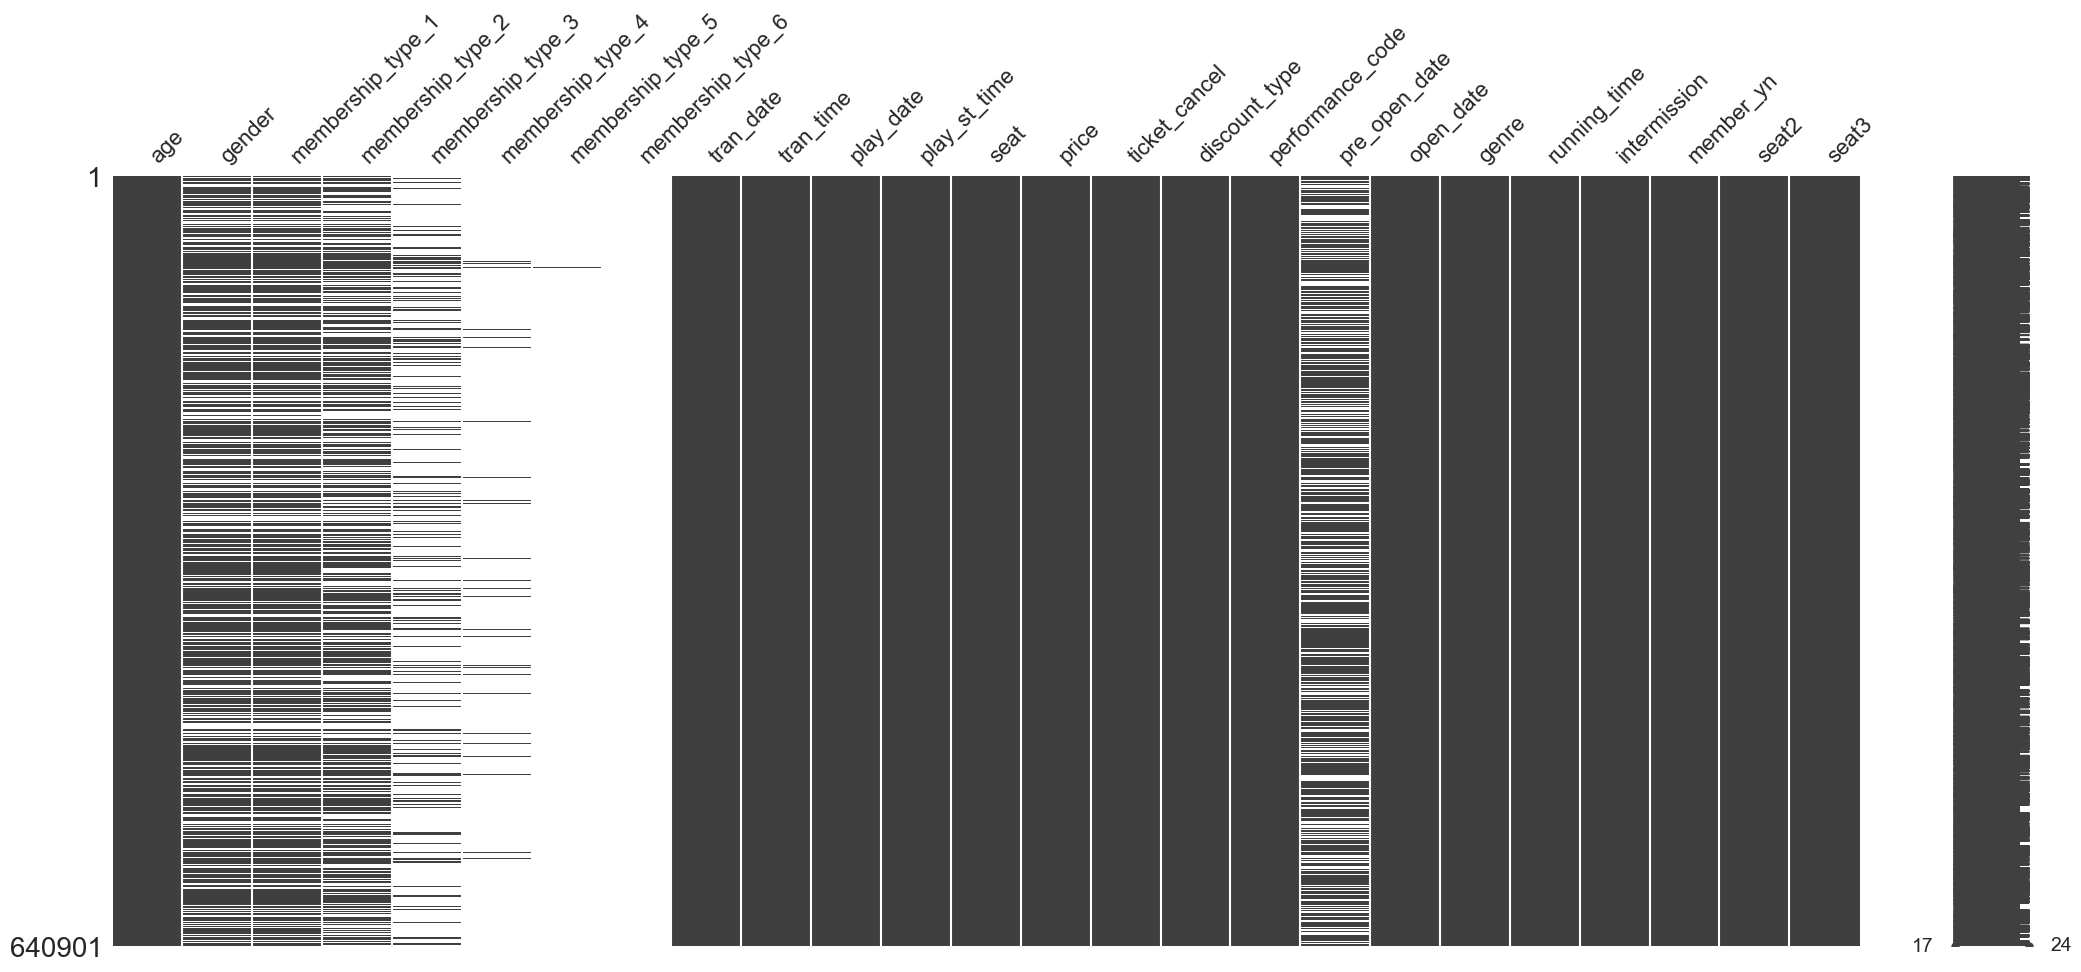

In [295]:
# 'performance_code' 별로 'age' 열의 평균을 계산합니다.
age_mean_by_code = df5.groupby('performance_code')['age'].mean()

# 결측치를 해당 'performance_code'의 평균값으로 대체합니다.
df5['age'] = df5.apply(
    lambda row: age_mean_by_code[row['performance_code']] if pd.isnull(row['age']) else row['age'],
    axis=1
)
msno.matrix(df5)

### 12. gender 결측치 처리

In [296]:
unique_values = df5['gender'].unique()
print(unique_values)

num_unique_values = df5['gender'].nunique()
print(num_unique_values)

['F' 'M' nan]
2


gender는 F(여성), M(남성), nan(결측치)로 구성되어있음.

In [297]:
# 각 'performance_code'에 대한 'gender' 열의 최빈값 계산
mode_values = df5.groupby('performance_code')['gender'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# 'gender' 열의 결측치를 해당하는 'performance_code'의 최빈값으로 채우기
df5['gender'] = df5.apply(
    lambda row: mode_values[row['performance_code']] if pd.isnull(row['gender']) else row['gender'],
    axis=1
)

<Axes: >

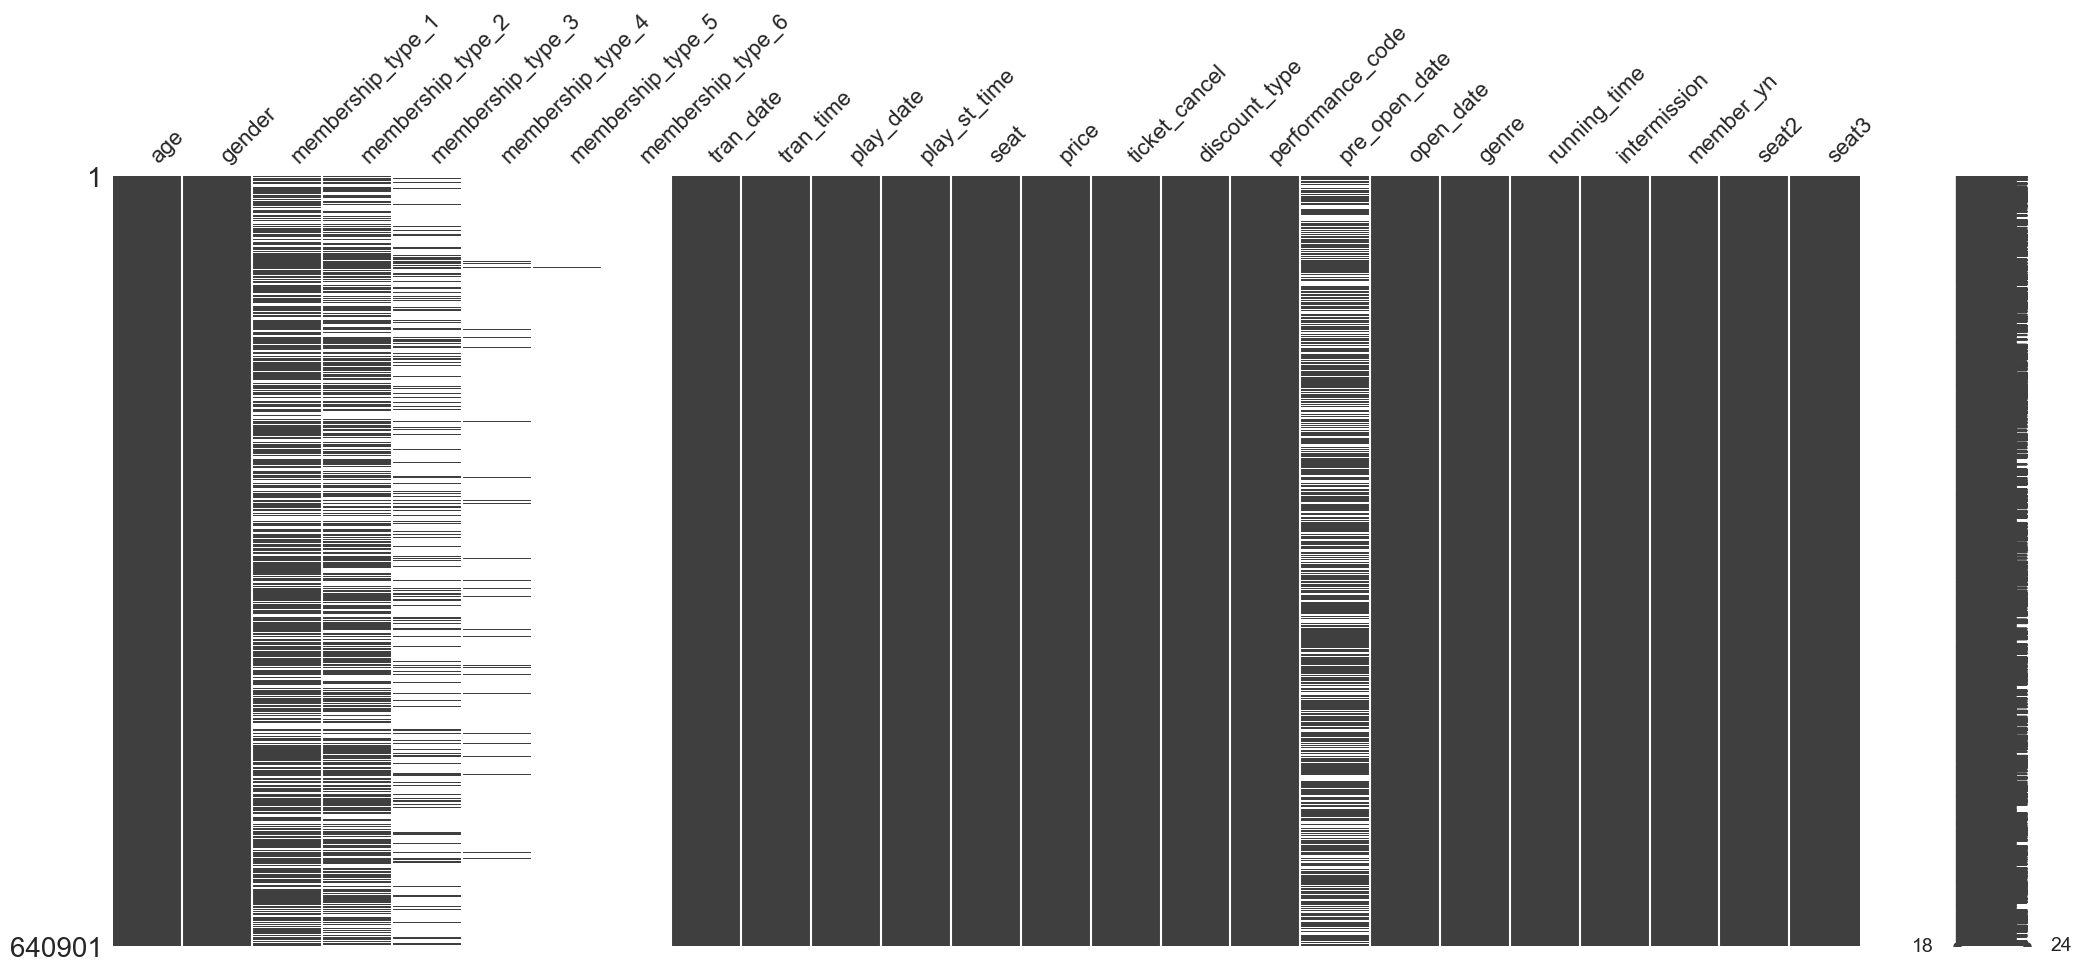

In [298]:
msno.matrix(df5)

In [299]:
# M, F를 1과 0으로 전처리
df5['gender'] = df5['gender'].replace({'F': 0, 'M': 1})

unique_values = df5['gender'].unique()
print(unique_values)

[0 1]


### 12. 멤버쉽 타입 결측치 처리

C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44264 (\N{HANGUL SYLLABLE GOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL})

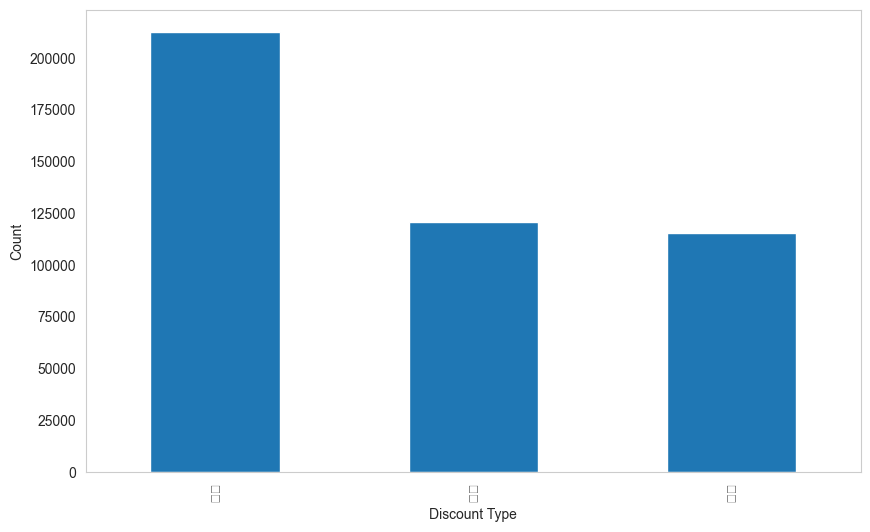

In [302]:
selected_discount_types = df5['membership_type_1']

discount_type_counts = selected_discount_types.value_counts()

plt.figure(figsize=(10, 6))
discount_type_counts.plot(kind='bar')

plt.grid(False)
plt.xlabel('Discount Type')
plt.ylabel('Count')
plt.show()

C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49913 (\N{HANGUL SYLLABLE SSAG})

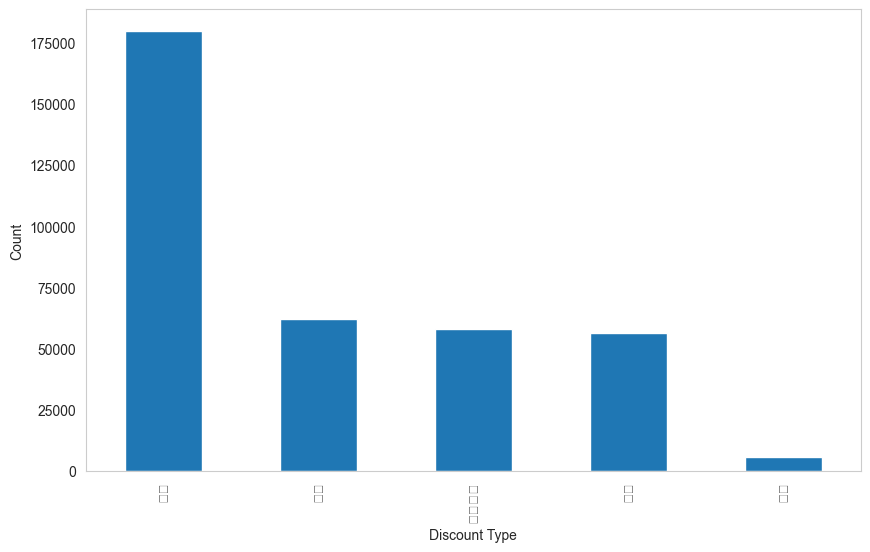

In [303]:
selected_discount_types = df5['membership_type_2']

discount_type_counts = selected_discount_types.value_counts()

plt.figure(figsize=(10, 6))
discount_type_counts.plot(kind='bar')

plt.grid(False)
plt.xlabel('Discount Type')
plt.ylabel('Count')
plt.show()

C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49913 (\N{HANGUL SYLLABLE SSAG})

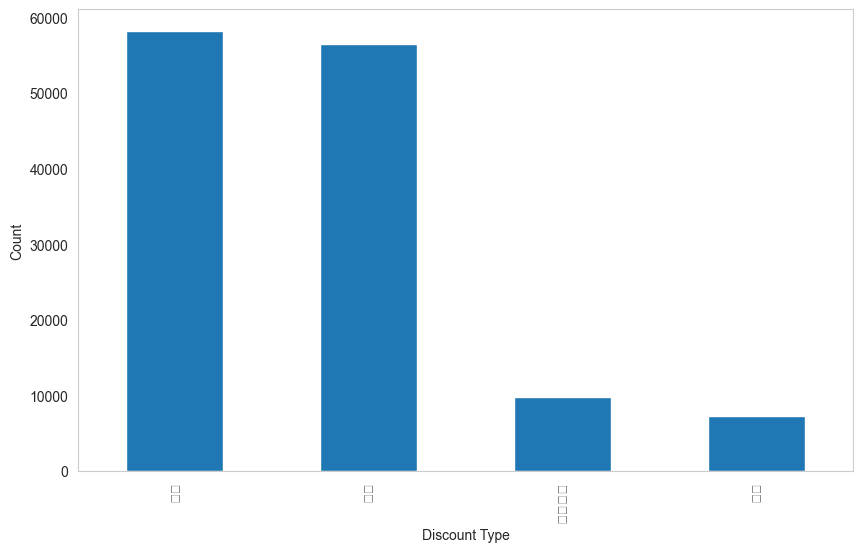

In [305]:
selected_discount_types = df5['membership_type_3']

discount_type_counts = selected_discount_types.value_counts()

plt.figure(figsize=(10, 6))
discount_type_counts.plot(kind='bar')

plt.grid(False)
plt.xlabel('Discount Type')
plt.ylabel('Count')
plt.show()

C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49913 (\N{HANGUL SYLLABLE SSAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53972 (\N{HANGUL SYLLABLE TYI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) 

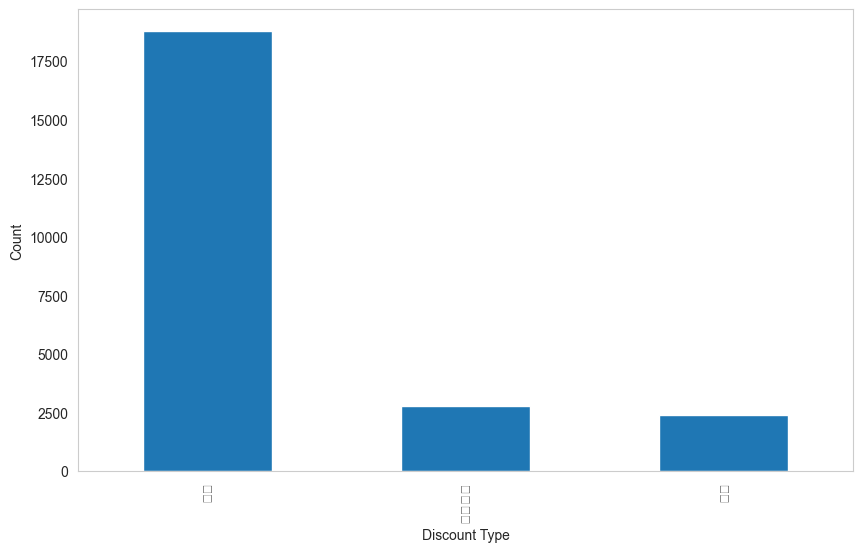

In [306]:
selected_discount_types = df5['membership_type_4']

discount_type_counts = selected_discount_types.value_counts()

plt.figure(figsize=(10, 6))
discount_type_counts.plot(kind='bar')

plt.grid(False)
plt.xlabel('Discount Type')
plt.ylabel('Count')
plt.show()

C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


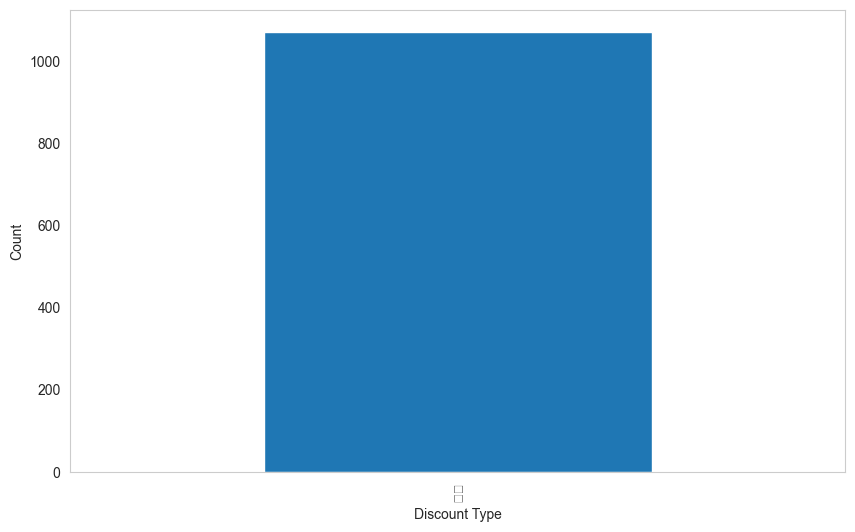

In [307]:
selected_discount_types = df5['membership_type_5']

discount_type_counts = selected_discount_types.value_counts()

plt.figure(figsize=(10, 6))
discount_type_counts.plot(kind='bar')

plt.grid(False)
plt.xlabel('Discount Type')
plt.ylabel('Count')
plt.show()

<Axes: >

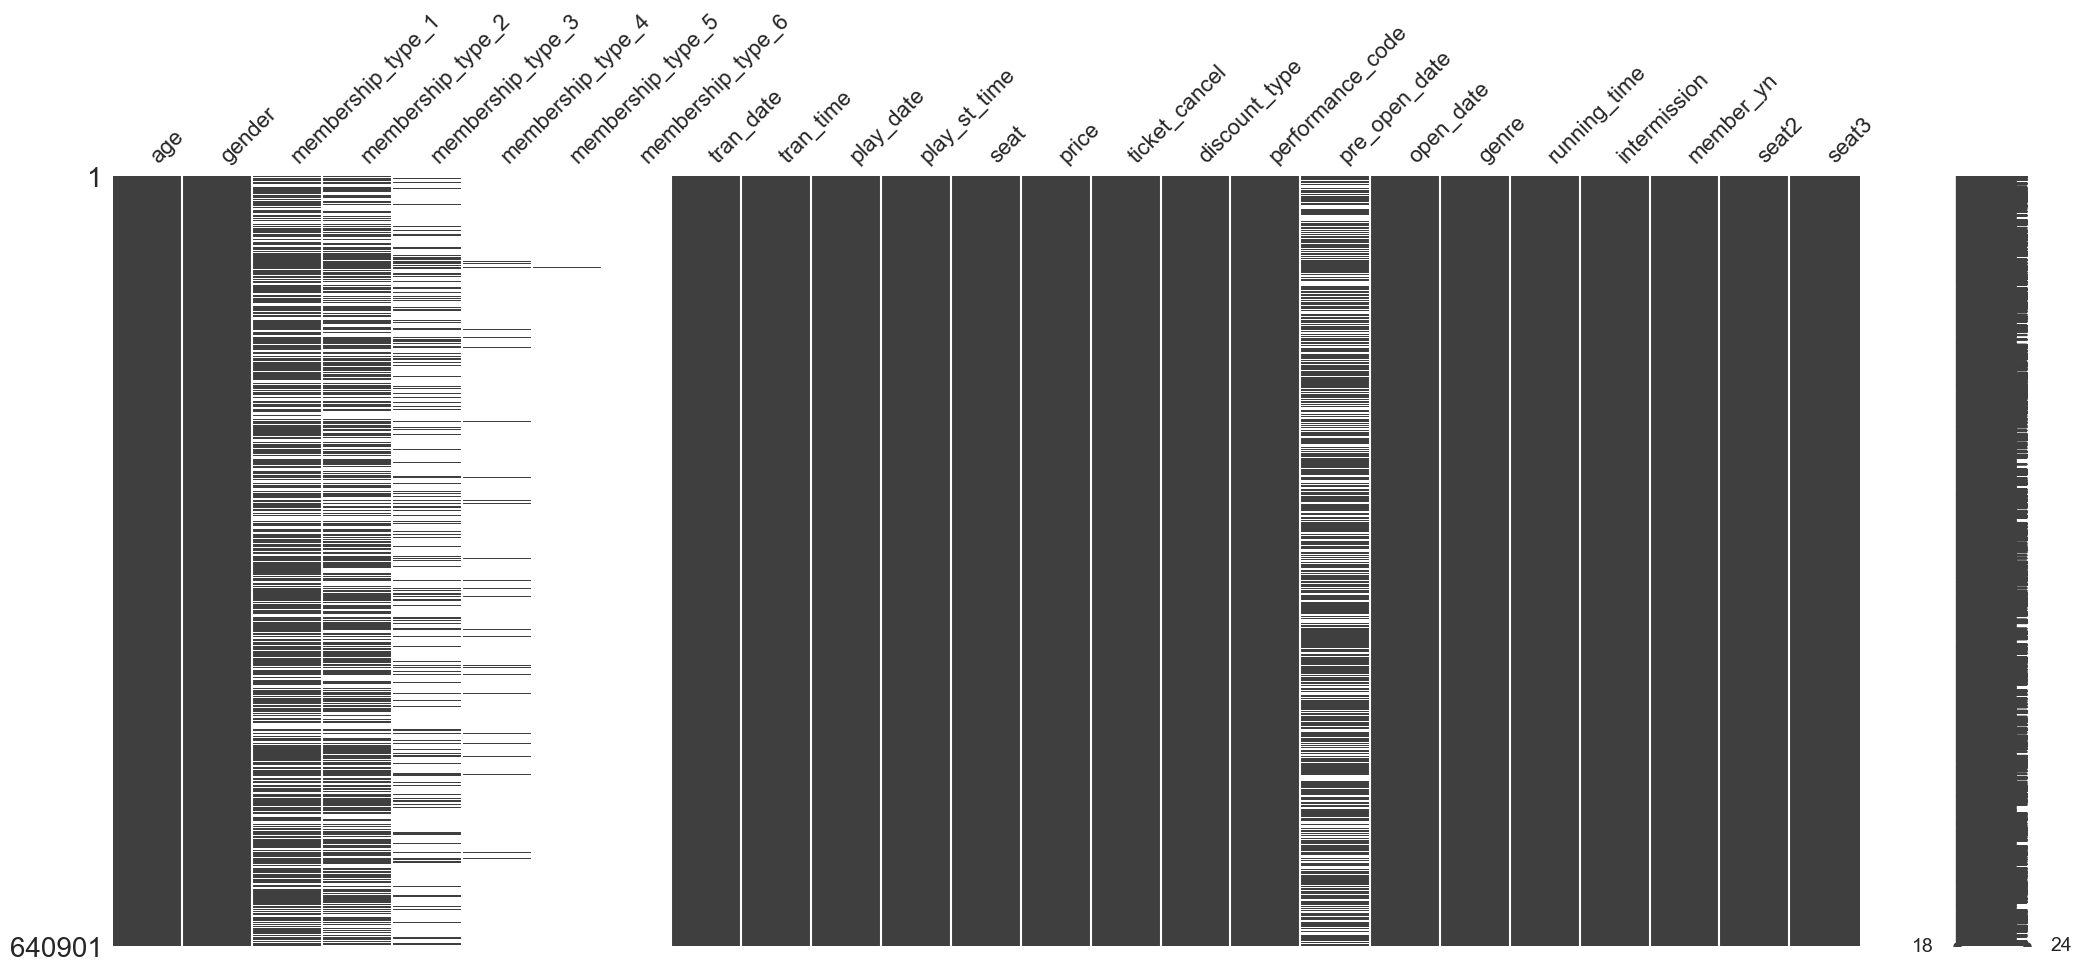

In [311]:
msno.matrix(df5)

In [315]:
df5['membership_type_1'] = df5['membership_type_1'].fillna('없음')
df5['membership_type_2'] = df5['membership_type_2'].fillna('없음')
df5['membership_type_3'] = df5['membership_type_3'].fillna('없음')
df5['membership_type_4'] = df5['membership_type_4'].fillna('없음')
df5['membership_type_5'] = df5['membership_type_5'].fillna('없음')
df5 = df5.drop('membership_type_6', axis=1)

<Axes: >

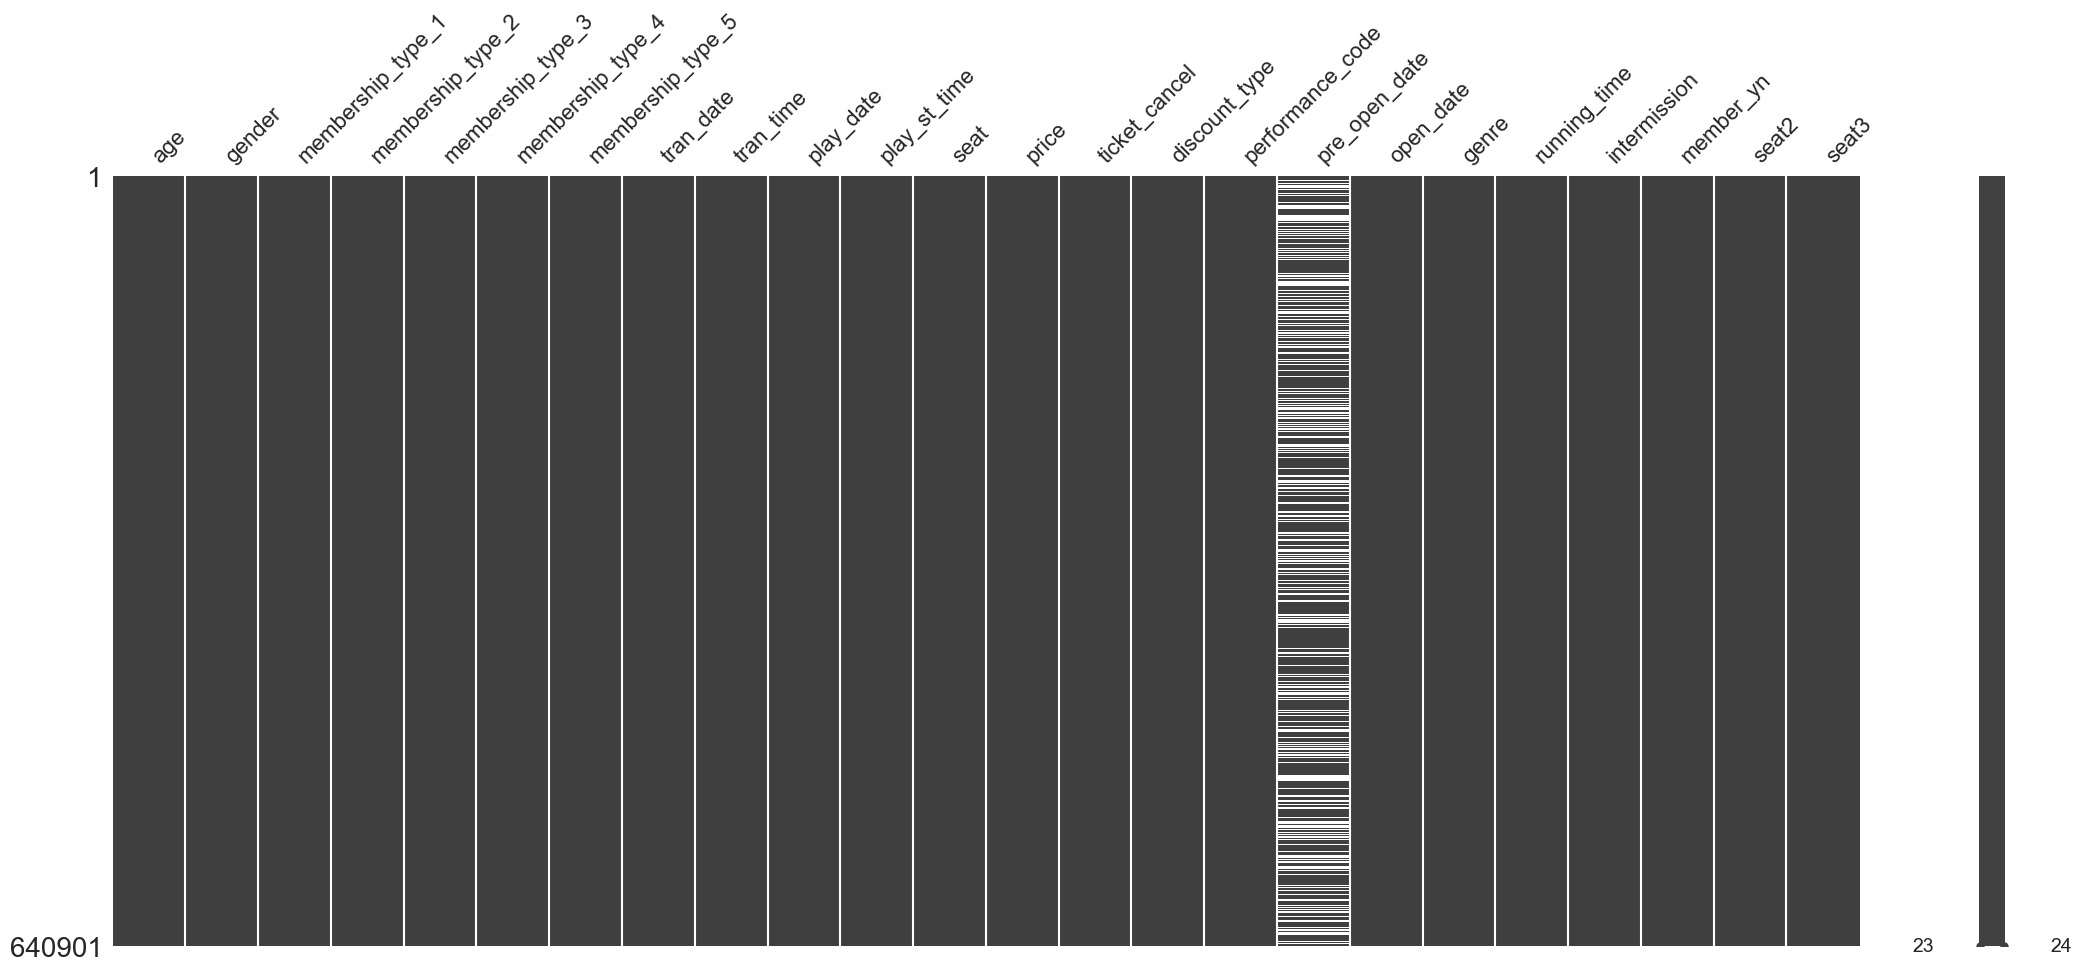

In [316]:
msno.matrix(df5)

In [317]:
# 'membership_type_1' 열의 '없음' 값을 0으로, '무료' 값을 1로 변경하고 데이터 타입을 int로 변환
df5['membership_type_1'] = df5['membership_type_1'].map({'없음': 0, '무료': 1, '골드' : 2, '블루' : 3}).astype(int)

df5['membership_type_2'] = df5['membership_type_2'].map({'없음': 0, '무료': 1, '그린' : 2, '싹틔우미' : 3, '골드' : 4, '노블' : 5}).astype(int)

df5['membership_type_3'] = df5['membership_type_3'].map({'없음': 0, '무료': 1, '그린' : 2, '싹틔우미' : 3, '노블' : 5}).astype(int)

df5['membership_type_4'] = df5['membership_type_4'].map({'없음': 0, '무료': 1, '그린' : 2, '싹틔우미' : 3, '노블' : 5}).astype(int)

df5['membership_type_5'] = df5['membership_type_5'].map({'없음': 0, '그린' : 2}).astype(int)

### 13. rate 생성 변수 만들기

In [318]:
df_counts = df5['performance_code'].value_counts().reset_index()
df_counts.columns = ['performance_code', 'total_count']

df_cancel = df5[df5['ticket_cancel'] == 2]['performance_code'].value_counts().reset_index()
df_cancel.columns = ['performance_code', 'cancel_count']

df6 = pd.merge(df_counts, df_cancel, on='performance_code', how='left')

df6['cancel_count'] = df6['cancel_count'].fillna(0)

df6['remaining_count'] = df6['total_count'] - df6['cancel_count']

df6['rate'] = df6.apply(lambda row: row['remaining_count'] / row['total_count'] if row['total_count'] != 0 else 0, axis=1)

df6 = df6.drop(['total_count', 'cancel_count', 'remaining_count'], axis=1)
df6

,performance_code,rate
0,145,0.64
1,44,0.80
2,2841,0.85
3,2538,0.71
4,2822,0.62
...,...,...
457,1192,0.78
458,2482,0.89
459,494,0.82
460,2932,0.84


In [331]:
df_merge = pd.merge(df5, df6, on='performance_code', how='left')
print(df_merge.shape)
df_merge.head()

(640901, 25)


,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,running_time,intermission,member_yn,seat2,seat3,rate
0,50.00,0,2,1,2,0,0,20220114,1512,20220204,2000,3층 BOX9 10,10000.00,2,일반,302,20220114.00,20220115.00,교향곡,120,15,Y,3층 BOX,3,0.59
1,50.00,1,1,0,0,0,0,20220206,1615,20220302,1930,1층 B블록12열 7,180000.00,0,일반,897,20220109.00,20220110.00,독주,90,0,Y,1층 B블록,1,0.58
2,30.00,0,3,1,0,0,0,20181124,1145,20190323,2000,1층 A블록2열 1,144000.00,2,블루회원 할인20%,528,20181119.00,20181119.00,교향곡,100,15,Y,1층 A블록,1,0.61
3,47.74,0,0,0,0,0,0,20191020,1459,20191109,1700,3층 E블록4열 8,73601.61,0,초대권 100% 할인,44,NaN,20191023.00,교향곡,100,15,N,3층 E블록,3,0.80
4,47.87,0,3,1,0,0,0,20190703,908,20190721,1700,1층 C블록17열 3,75000.00,0,일반,1528,NaN,20190413.00,클래식,100,15,N,1층 C블록,1,0.93


<Axes: >

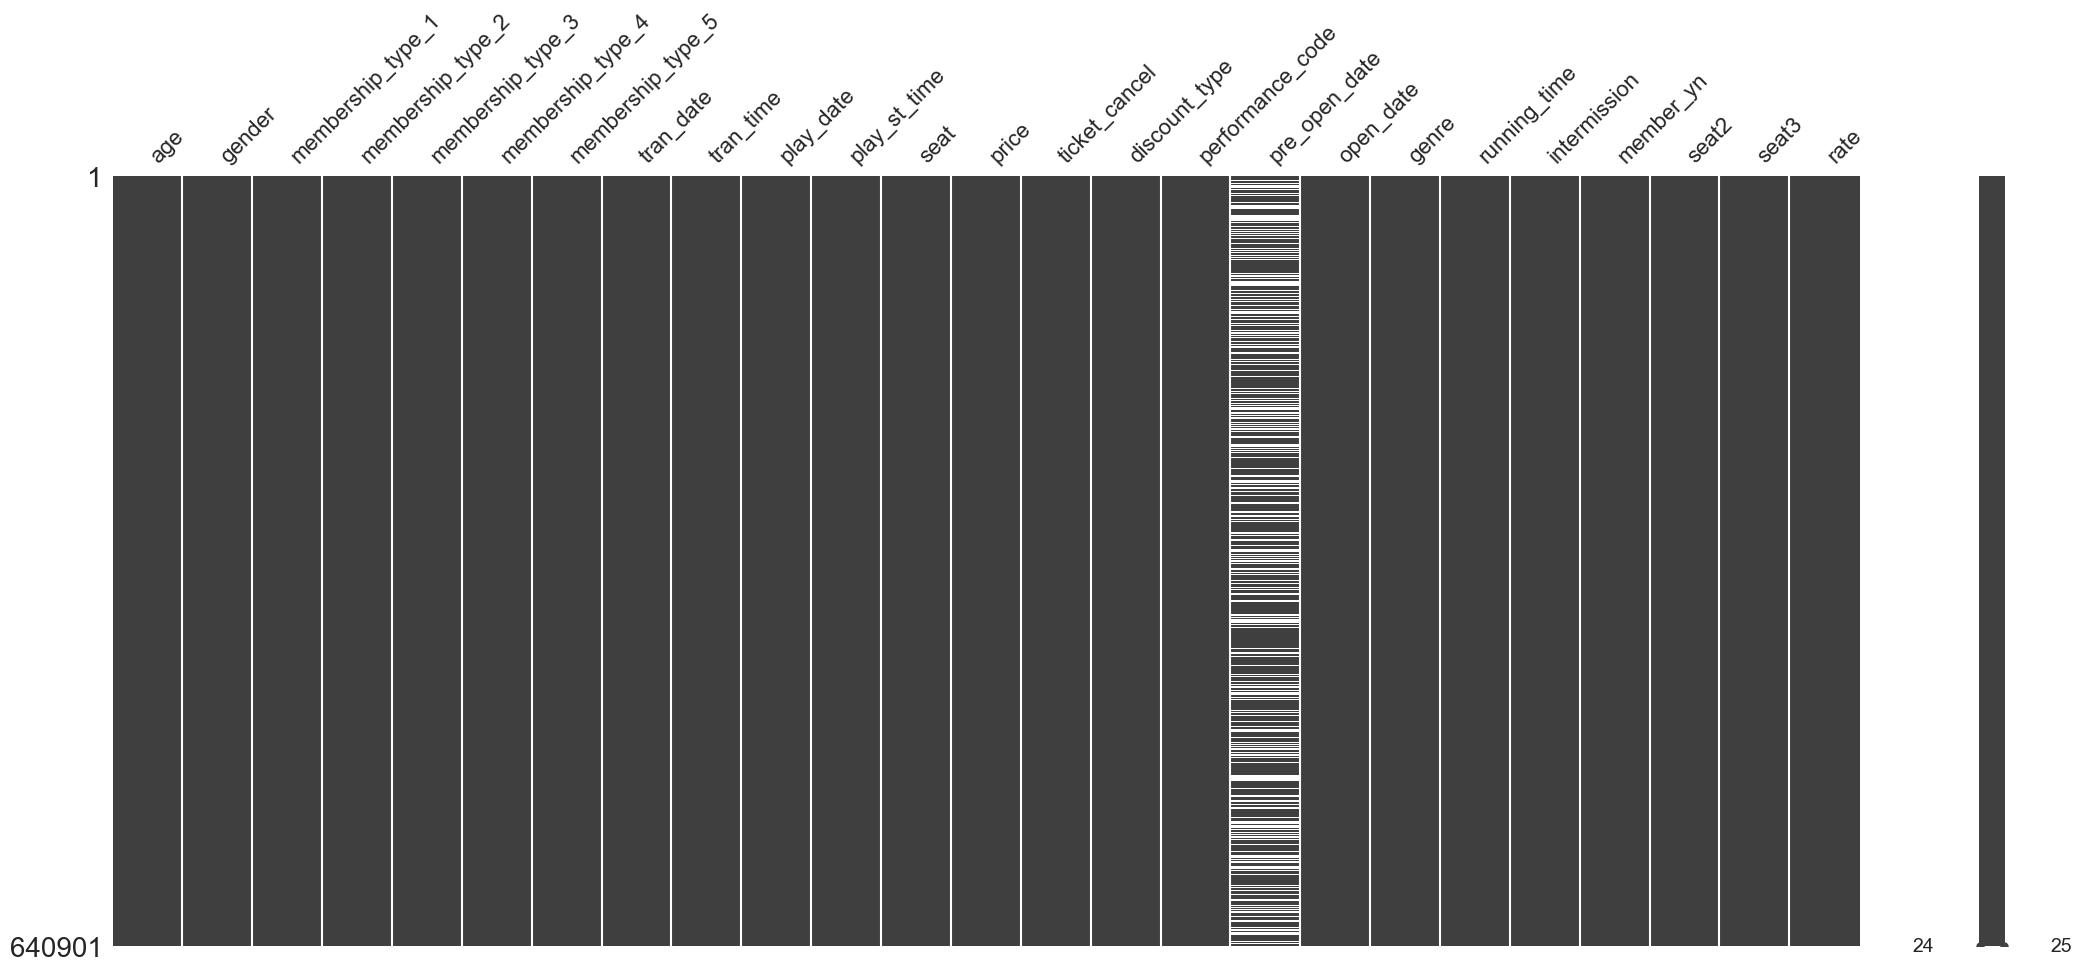

In [332]:
msno.matrix(df_merge)

### 14. 모델 학습을 위하여 member_yn 이진화

In [333]:
unique_values = df_merge['member_yn'].unique()
print(unique_values)

['Y' 'N']


In [334]:
df_merge['member_yn'] = df_merge['member_yn'].replace({'Y': 1, 'N': 0})

In [335]:
unique_values = df_merge['member_yn'].unique()
print(unique_values)

[1 0]


### 15. 모델 학습을 위하여 discount_type 이진화

In [336]:
unique_values = df_merge['discount_type'].unique()
print(unique_values)
print(len(unique_values))

['일반' '블루회원 할인20%' '초대권 100% 할인' 'K-lang 멤버십 회원(1인2매)20%' '싹틔우미 할인40%'
 '라흐마니노프탄생150주년(8매/3.27까지)20%' '골드회원 할인10%' '장애인/국가유공자 할인50%' '싹딜가(골드)50%'
 '그린회원 할인5%' '초,중,고,대학생(본인만)30%' '골드회원 할인30%' '그린회원 할인20%' '단체100인이상50%'
 '기획사 100% 할인' '공연예매권' '초/중/고등학생 할인(본인만)30%' '골드회원 할인25%'
 '조기예매 할인(1인8매/3월11일까지)30%' '골드회원 할인5%' '기타 100% 할인' '만65세 이상(본인만)50%'
 '싹딜가(블루)50%' '그린회원 할인15%' '직장인 할인(1인2매)20%' '블루회원 할인10%'
 '초/중/고/대학생 할인(본인만)50%' '문화릴레이(1인2매/공연유료티켓제시)10%' '연주자 100% 할인'
 '조기예매 할인10%' 'K-Lang 할인(1인2매)20%' '골드회원 할인40%' '초/중/고등학생 할인(본인만)20%'
 '초/중/고/대학생 할인30%' '의사상자(동반1인/신분증지참)50%' '초,중,고,대학생(본인만)50%'
 '조기예매할인(1인8매/~6.30까지)30%' '골드회원 할인20%' '그린회원 할인10%' '블루회원 할인5%'
 '스탭 할인30%' '홍보 100% 할인' 'KOSYMI  유료회원(1인4매)40%' '청소년(만 24세 이하/본인만)30%'
 '얼리버드 할인(1인4매/10월31일까지)10%' '패밀리할인(3매이상/1인4매)15%'
 '조기예매 할인(1인8매/9월16일까지)30%' '골드회원 할인15%' '청소년(만7세~만24세/신분증지참)20%'
 '실버할인(만65세 이상/본인만)50%' '조기예매할인(1인2매/~9월8일까지)30%' '의상자(3급이하/본인만)50%'
 '얼리버드 할인(10월16일까지)50%' '조기예매할인(8월15일까지예매시)40%' '얼리버드 할인(1인4매)20%'
 '초/중/고/대

In [337]:
df_merge.loc[df_merge['discount_type'].str.contains('일반'), 'discount_type'] = '0'
df_merge.loc[df_merge['discount_type'].str.contains('5%'), 'discount_type'] = '5'
df_merge.loc[df_merge['discount_type'].str.contains('10%'), 'discount_type'] = '10'
df_merge.loc[df_merge['discount_type'].str.contains('20%'), 'discount_type'] = '20'
df_merge.loc[df_merge['discount_type'].str.contains('30%'), 'discount_type'] = '30'
df_merge.loc[df_merge['discount_type'].str.contains('40%'), 'discount_type'] = '40'
df_merge.loc[df_merge['discount_type'].str.contains('50%'), 'discount_type'] = '50'
df_merge.loc[df_merge['discount_type'].str.contains('60%'), 'discount_type'] = '60'
df_merge.loc[df_merge['discount_type'].str.contains('80%'), 'discount_type'] = '80'
df_merge.loc[df_merge['discount_type'].str.contains('100%'), 'discount_type'] = '100'

In [339]:
df_merge.loc[df_merge['discount_type'].str.contains('12%'), 'discount_type'] = '12'

In [340]:
unique_values = df_merge['discount_type'].unique()
print(unique_values)
print(len(unique_values))

['0' '20' '100' '40' '10' '50' '5' '30' '공연예매권' '차액' '골드회원+음반패키지' '당일할인티켓'
 '일만원의 나눔' '기획사할인' '초/중/고등학생 할인(본인만)' '당일할인티켓_' '12' '초/중/고등학생 할인' '기획사'
 '특판B' '노르웨이의 숲 도서 인증 할인' '60' '초/중/고/대학생 할인(본인만)' '도서 인증 S' '이만원의 기쁨'
 '골드회원+음반 패키지' '블랙프라이데이 이벤트' '특판D' 'A석+호두까기인형 패키지' '수험생 할인(동반1인)'
 '도서 인증 A' '삼만원의 행복' '공연진행석' '하비에르 국제학교 학부모, 직원' '2+1 특별할인' '특판A' '80'
 '골드회원 할인+음반패키지' '오만원의 사랑' '하비에르 국제학교 재학생' 'S석+호두까기인형 패키지'
 '초/중/고/대학생(본인)+음반패키지' '싹틔우미 할인']
43


['공연예매권', '차액', '골드회원+음반패키지', '당일할인티켓', '일만원의 나눔', '기획사할인', '초/중/고등학생 할인(본인만)', '당일할인티켓_', '초/중/고등학생 할인', '기획사', '특판B', '노르웨이의 숲 도서 인증 할인', '초/중/고/대학생 할인(본인만)', '도서 인증 S', '이만원의 기쁨', '골드회원+음반 패키지', '블랙프라이데이 이벤트', '특판D', 'A석+호두까기인형 패키지', '수험생 할인(동반1인)', '도서 인증 A', '삼만원의 행복', '공연진행석', '하비에르 국제학교 학부모, 직원', '2+1 특별할인', '특판A', '골드회원 할인+음반패키지', '오만원의 사랑', '하비에르 국제학교 재학생', 'S석+호두까기인형 패키지', '초/중/고/대학생(본인)+음반패키지', '싹틔우미 할인']

In [344]:
discount_types = ['공연예매권', '차액', '골드회원+음반패키지', '당일할인티켓', '일만원의 나눔', '기획사할인', '초/중/고등학생 할인(본인만)', '당일할인티켓_', '초/중/고등학생 할인', '기획사', '특판B', '노르웨이의 숲 도서 인증 할인', '초/중/고/대학생 할인(본인만)', '도서 인증 S', '이만원의 기쁨', '골드회원+음반 패키지', '블랙프라이데이 이벤트', '특판D', 'A석+호두까기인형 패키지', '수험생 할인(동반1인)', '도서 인증 A', '삼만원의 행복', '공연진행석', '하비에르 국제학교 학부모, 직원', '2+1 특별할인', '특판A', '골드회원 할인+음반패키지', '오만원의 사랑', '하비에르 국제학교 재학생', 'S석+호두까기인형 패키지', '초/중/고/대학생(본인)+음반패키지', '싹틔우미 할인']

count = df_merge[df_merge['discount_type'].isin(discount_types)].shape[0]
print(count)

12651


모델 성능 개선을 위해서 개수가 적기때문에 해당 데이터들을 포함하는 행은 삭제

In [345]:
discount_types = ['공연예매권', '차액', '골드회원+음반패키지', '당일할인티켓', '일만원의 나눔', '기획사할인', '초/중/고등학생 할인(본인만)', '당일할인티켓_', '초/중/고등학생 할인', '기획사', '특판B', '노르웨이의 숲 도서 인증 할인', '초/중/고/대학생 할인(본인만)', '도서 인증 S', '이만원의 기쁨', '골드회원+음반 패키지', '블랙프라이데이 이벤트', '특판D', 'A석+호두까기인형 패키지', '수험생 할인(동반1인)', '도서 인증 A', '삼만원의 행복', '공연진행석', '하비에르 국제학교 학부모, 직원', '2+1 특별할인', '특판A', '골드회원 할인+음반패키지', '오만원의 사랑', '하비에르 국제학교 재학생', 'S석+호두까기인형 패키지', '초/중/고/대학생(본인)+음반패키지', '싹틔우미 할인']

df_merge = df_merge[~df_merge['discount_type'].isin(discount_types)]

In [346]:
df_merge.shape

(628250, 25)

### 16. 모델 학습을 위하여 범주형 genre열 정규화

In [348]:
unique_values = df_merge['genre'].unique()
print(unique_values)
print(len(unique_values))

['교향곡' '독주' '클래식' '오페라' '합창' '실내악' '콘서트' '복합장르' '성악' '재즈' '크로스오버' '기타']
12


### END. 모델 예측에 필요없다고 판단되는 열 삭제